In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import tqdm as tq
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('bankchurners.csv')

In [5]:
# retirando as duas ultimas colunas como sugerido pelo autor do dataset
df = df.iloc[:, :-2]

In [6]:
# retirando coluna de clientnum
df = df.iloc[:, 1:]

In [7]:
df.columns = ['attrition_flag', 'age', 'gender', 'dependent_count', 'education_level', 'marital_status', 'income_category',
              'card_category', 'months_book', 'total_relationship_count', 'months_inactive_12_mon',
              'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal', 'avg_open_to_buy', 'total_amt_change_Q4_Q1',
              'total_trans_amt', 'total_trans_ct', 'total_ct_change_Q4_Q1', 'avg_utilization_ratio']

In [8]:
df.head(4)

,attrition_flag,age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_change_Q4_Q1,total_trans_amt,total_trans_ct,total_ct_change_Q4_Q1,avg_utilization_ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760


## Significado das Variáveis

Variável target: attrition_flag!

attrition_flag: Indica a atividade do cliente, se a conta está fechada ou ativa.

age: Indica a idade do cliente.

gender: Indica o gênero do cliente.

dependent_count: Indica o número de dependentes.

education_level: Indica o nível de educação do cliente.

marital_status: Indica o estado civíl do cliente.

income_category: Indica a faixa de renda anual do cliente.

card_category: Indica o tipo de cartão do cliente.

months_book: Indica quantos meses o cliente está com o banco.

total_relationship_count: Indica o número de produtos do banco que o cliente possui.

months_inactive_12_mon: Indica quantos meses o cliente esteve inativo nos últimos 12 meses.

contacts_count_12_mon: Indica o número de vezes que o cliente entrou em contato nos últimos 12 meses.

credit_limit: Indica o limite do cartão de crédito do cliente.

total_revolving_bal: Indica o Saldo rotativo do cartão de crédito (Mostra o quanto não foi pago no tempo certo).

avg_open_to_buy: Indica a linha de crédito aberta para compra (média dos últimos 12 meses).

total_amt_change_Q4_Q1: Indica a mudança no valor transacionado entre Q4 e Q1.

total_trans_amt: Indica o valor transacionado nos últimos 12 meses.

total_trans_ct: Indica a quantidade de transações nos últimos 12 meses.

total_ct_change_Q4_Q1: Indica a mudança na quantidade transacionada entre Q4 e Q1.

avg_utilization_ratio: Indica o nível de utilização médio do cartão de crédito.

## Verificando NA
Sem valores NA em qualquer coluna.

In [9]:
df.isna().sum()

attrition_flag              0
age                         0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_book                 0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_change_Q4_Q1      0
total_trans_amt             0
total_trans_ct              0
total_ct_change_Q4_Q1       0
avg_utilization_ratio       0
dtype: int64

## Verificando tipo das colunas
Todas as colunas são numéricas, exceto: attrition_flag, gender, education_level, marital_status, income_category e card_category.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   attrition_flag            10127 non-null  object 
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   income_category           10127 non-null  object 
 7   card_category             10127 non-null  object 
 8   months_book               10127 non-null  int64  
 9   total_relationship_count  10127 non-null  int64  
 10  months_inactive_12_mon    10127 non-null  int64  
 11  contacts_count_12_mon     10127 non-null  int64  
 12  credit_limit              10127 non-null  float64
 13  total_revolving_bal       10127 non-null  int64  
 14  avg_op

## Retirando valores 'Unknown'

In [11]:
df = df[df['education_level'] != 'Unknown']
df = df[df['marital_status'] != 'Unknown']
df = df[df['income_category'] != 'Unknown']

In [12]:
print('O tamanho do dataset passa a ser de: ' + str(len(df)))

O tamanho do dataset passa a ser de: 7081


In [13]:
corr = df.apply(lambda x : pd.factorize(x)[0]).corr(method = 'pearson', min_periods = 1)
corr

,attrition_flag,age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_change_Q4_Q1,total_trans_amt,total_trans_ct,total_ct_change_Q4_Q1,avg_utilization_ratio
attrition_flag,1.000000,-0.018082,0.035358,-0.014059,0.033832,0.020587,0.009386,0.005794,-0.023060,0.143146,0.162024,0.024637,0.092852,-0.157708,0.078549,0.089294,-0.000188,-0.343121,-0.104692,-0.165973
age,-0.018082,1.000000,-0.015240,0.167710,-0.019587,0.011355,-0.032289,-0.038820,0.244705,-0.042717,-0.041740,0.019218,-0.063470,-0.009180,-0.090243,0.028267,-0.077451,-0.046062,-0.019265,0.028084
gender,0.035358,-0.015240,1.000000,0.020206,0.015015,0.016222,-0.144000,-0.087829,-0.015739,-0.013822,0.013926,-0.023629,0.041399,0.021785,-0.006279,0.010961,0.083413,0.047844,0.050826,0.131970
dependent_count,-0.014059,0.167710,0.020206,1.000000,-0.003028,0.021431,-0.018577,-0.000351,0.039300,-0.024167,-0.001057,0.006995,-0.025917,-0.030378,-0.035504,-0.014511,-0.030042,-0.021184,-0.023925,0.015810
education_level,0.033832,-0.019587,0.015015,-0.003028,1.000000,0.021546,0.008888,0.007514,0.004586,0.008675,-0.002913,-0.003215,0.000107,-0.018366,0.004185,0.009429,0.006312,-0.007163,0.007123,-0.013828
marital_status,0.020587,0.011355,0.016222,0.021431,0.021546,1.000000,-0.007798,0.037918,0.002668,0.013135,0.002199,-0.004111,0.074070,0.014584,0.080409,0.001800,0.101534,0.121755,0.065766,-0.010175
income_category,0.009386,-0.032289,-0.144000,-0.018577,0.008888,-0.007798,1.000000,0.031107,-0.001876,0.020847,-0.015200,0.000040,-0.047339,0.013254,0.007542,-0.011603,-0.010833,-0.009765,-0.000839,-0.020949
card_category,0.005794,-0.038820,-0.087829,-0.000351,0.007514,0.037918,0.031107,1.000000,-0.022217,0.066160,-0.001122,-0.006642,-0.057231,0.026692,0.122499,0.001848,0.130262,0.118005,0.025162,-0.070574
months_book,-0.023060,0.244705,-0.015739,0.039300,0.004586,0.002668,-0.001876,-0.022217,1.000000,-0.033883,-0.033298,0.006228,-0.035393,0.005431,-0.038892,0.000184,-0.031635,-0.007890,-0.002678,0.014006
total_relationship_count,0.143146,-0.042717,-0.013822,-0.024167,0.008675,0.013135,0.020847,0.066160,-0.033883,1.000000,-0.006698,-0.036801,0.222625,0.038200,0.283423,0.002616,0.343742,0.231082,0.118762,-0.013620


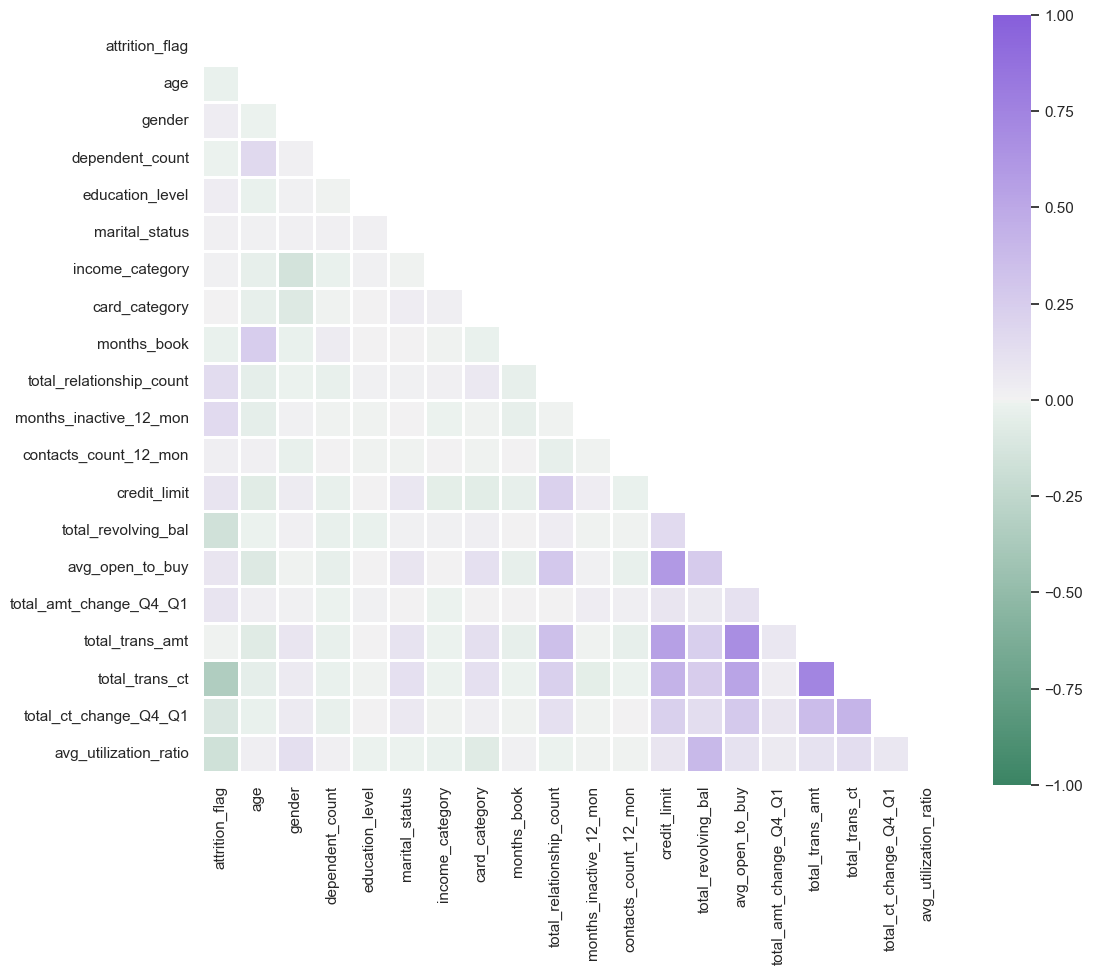

In [14]:
sns.set_theme(style = 'white')

corr = corr
mask = np.triu(np.ones_like(corr, dtype = bool))
f, ax = plt.subplots(figsize = (12, 10))
cmap = sns.diverging_palette(150, 275, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, vmin = -1, center = 0,
            square = True, linewidths = .9)

plt.show();

## Análise Exploratória

### Funções para auxiliar no processo!

In [15]:
def calculo_informacoes(x):
    print('O valor mínimo da variável é: ' + str(x.min()))
    print('O valor máximo da variável é: ' + str(x.max()))
    print('O valor médio é: ' + str(round(x.mean(), 2)))
    print('O valor mediano é: ' + str(x.median()))
    print('O valor moda é: ' + str(x.mode()[0]))
    print('O coeficiente de Assimetria é: ' + str(x.skew()))
    print('O coeficiente de Curtose é: ' + str(x.kurtosis()))
    print('Esse é o p-valor do teste de Shapiro-Wilk: ' + str(stats.shapiro(x)[1]))
    

In [16]:
def percentagem(x):
    df_estat = df.groupby([x]).agg({x : 'count'}).rename(columns = {x : 'size'}).reset_index()
    df_estat['prop'] = (df_estat['size'] / len(df)) * 100
    df_estat['prop'] = round(df_estat['prop'], 2)
    df_estat = df_estat.sort_values(by = ['prop'], ascending = False)
    
    for i, j in zip(df_estat[x], df_estat['prop']):
        print('{} - {}%'.format(i, j))

In [17]:
def tabela(x):
    df_estat = df.groupby(['attrition_flag', x]).agg({x : 'count'}).rename(columns = {x : 'size'}).reset_index()
    df_compa = df_estat.groupby([x]).agg({'size' : 'sum'}).reset_index()
    mergea = df_estat.merge(df_compa, how = 'inner', on = x)
    mergea['prop'] = (mergea['size_x'] / mergea['size_y']) * 100
    mergea['prop'] = round(mergea['prop'], 2)
    mergea = mergea.sort_values(by = ['prop'], ascending = False)
    
    for i, j, k in zip(mergea['attrition_flag'], mergea[x], mergea['prop']):
        print('{} - {} - {}%'.format(i, j, k))

In [18]:
def histograma_plt(data, x):
    fig, ax = plt.subplots(figsize = (8, 4))
    
    ax = sns.histplot(data = data, x = x, kde = True)
    ax.set_title('Histograma de: ' + x, fontsize = 10)
    ax.set_xlabel(x)
    ax.set_ylabel('')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    fig.tight_layout()
    plt.show();

In [19]:
def scater_plt(data, x, y):
    fig, ax = plt.subplots(figsize = (8, 4))
    
    ax = sns.scatterplot(data = data, x = x, y = y)
    ax.set_title('Scatterplot de: ' + x + ' e ' + y, fontsize = 10)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    fig.tight_layout()
    plt.show();

In [20]:
def count_plt(data, x, hue):
    fig, ax = plt.subplots(figsize = (8, 4))
    
    ax = sns.countplot(data = data, x = x, hue = hue, palette = "Blues")
    
    ax.set_title('Gráfico de: ' + x + ' de acordo com a classe: ' + hue, fontsize = 10)
    ax.set_xlabel(x)
    ax.set_ylabel('')
    ax.legend(labels = ['Cliente Ativo', 'Cliente Inativo'], loc = 'upper right')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    fig.tight_layout()
    plt.show();

In [21]:
def box_plt(data, x, y):
    p_kruskal_teste = stats.kruskal(df[df[y] == 'Existing Customer'][x],
                                    df[df[y] == 'Attrited Customer'][x])[1]

    p_kruskal_teste = round(p_kruskal_teste, 4)
    
    fig, ax = plt.subplots(figsize = (8, 4))
    
    ax = sns.boxplot(data = data, x = x, y = y, orient = 'h', palette = 'Blues')
    fig.suptitle('Boxplot entre: ' + x + ' e ' + y, fontsize = 14)
    ax.set_title('O resultado do teste de Kruskal Wallis é de: ' + str(p_kruskal_teste), loc = 'left',
                fontsize = 10)
    ax.set_xlabel(x)
    ax.set_ylabel('')
    plt.yticks(rotation = 45)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    fig.tight_layout()
    plt.show();

#### Status da conta bancária

84.28% dos clientes dessa base de dados são clientes ativos, enquanto os 15.72% restantes já não são clientes do banco.

In [22]:
percentagem('attrition_flag')

Existing Customer - 84.28%
Attrited Customer - 15.72%


#### Gênero

Temos 52.34% de clientes do sexo masculino e 47.66% do sexo feminino. Quando agrupamos as informações do sexo do cliente pela categoria que indica a atividade do cliente, observamos que existem mais clientes inativos entre as mulheres com 17.07%. Para os homens, 14.49% estão inativos.

In [23]:
percentagem('gender')

M - 52.34%
F - 47.66%


In [24]:
tabela('gender')

Existing Customer - M - 85.51%
Existing Customer - F - 82.93%
Attrited Customer - F - 17.07%
Attrited Customer - M - 14.49%


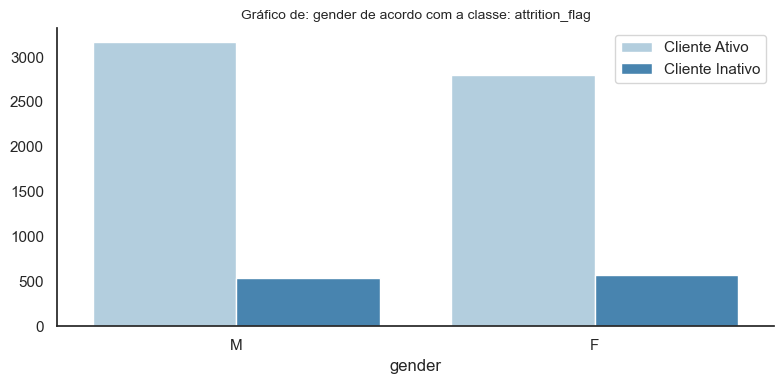

In [25]:
count_plt(df, 'gender', 'attrition_flag')

#### Idade

Na variável que indica a idade do cliente, podemos observar que o cliente mais novo possui 26 anos enquanto o mais velho tem 73 anos. A idade média é de 46.35 anos e o cliente da mediana possui 46 anos. O teste de Shapiro-Wilk apresenta evidência de uma distribuição normal.

No boxplot podemos ver que as medianas estão muito próximas quando comparamos a variável idade com a variável que indica a o estado de atividade da conta do cliente. O teste de Kruskall-Wallis nos apresenta evidência de que não podemos rejeitar a hipótese nula de que as distribuições são iguais.

In [26]:
calculo_informacoes(df['age'])

O valor mínimo da variável é: 26
O valor máximo da variável é: 73
O valor médio é: 46.35
O valor mediano é: 46.0
O valor moda é: 46
O coeficiente de Assimetria é: -0.03438531638775839
O coeficiente de Curtose é: -0.3651268205723528
Esse é o p-valor do teste de Shapiro-Wilk: 1.2413652733783004e-13


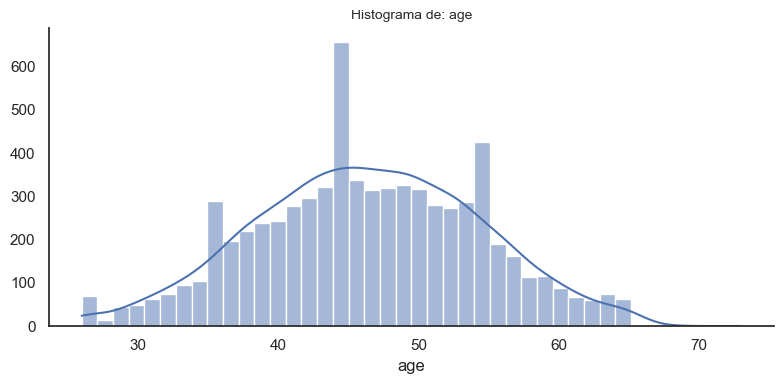

In [27]:
histograma_plt(df, 'age')

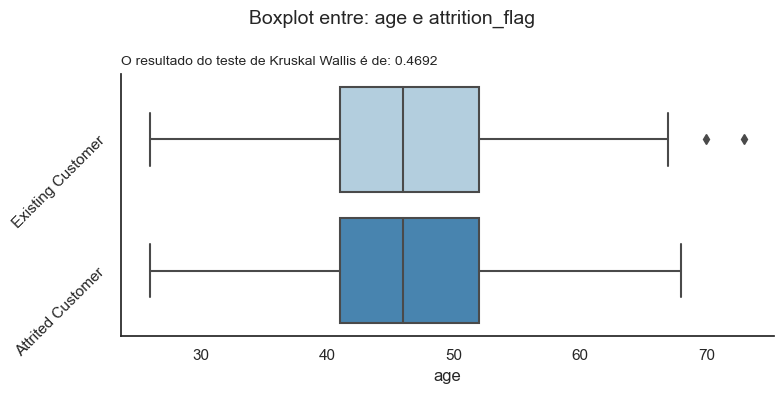

In [28]:
box_plt(df, 'age', 'attrition_flag')

#### Nível de Educação

Temos quase 37% de clientes com educação High School, que é equivalente ao ensino médio no Brasil. Logo em seguida aparecem os clientes com ensino superior completo, ou Graduate, com 23.34%. Cerca de 5% dos clientes possuem doutorado e cerca de 17% não possuem formação escolar.

Olhando essas informações de acordo com o estado da conta do cliente, verificamos que os clientes com doutorado são os que apresentam maior proporção entre os inativos com quase 21%. Por outro lado, os clientes com nível educadional High School são os que apresentam menor proporção entre os inativos.

In [29]:
percentagem('education_level')

Graduate - 36.59%
High School - 23.34%
Uneducated - 17.0%
College - 11.92%
Post-Graduate - 6.09%
Doctorate - 5.06%


In [30]:
tabela('education_level')

Existing Customer - High School - 85.66%
Existing Customer - Uneducated - 84.55%
Existing Customer - College - 84.36%
Existing Customer - Graduate - 84.33%
Existing Customer - Post-Graduate - 82.13%
Existing Customer - Doctorate - 79.05%
Attrited Customer - Doctorate - 20.95%
Attrited Customer - Post-Graduate - 17.87%
Attrited Customer - Graduate - 15.67%
Attrited Customer - College - 15.64%
Attrited Customer - Uneducated - 15.45%
Attrited Customer - High School - 14.34%


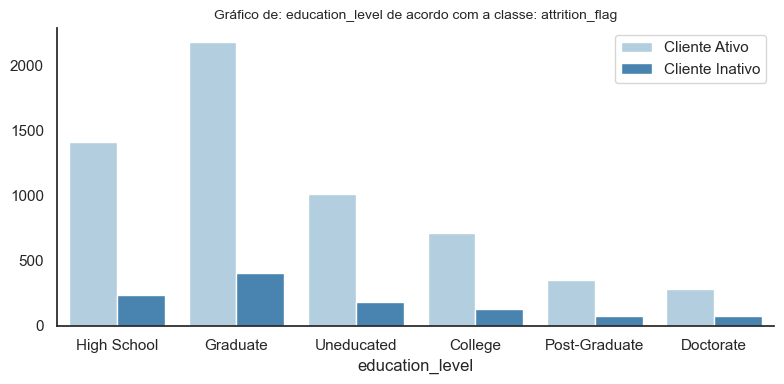

In [31]:
count_plt(df, 'education_level', 'attrition_flag')

#### Estado Civil

Temos pouco mais de 50% dos clientes casados. 41.63% são solteiros e pouco mais de 8% dos clientes são divorciados. De acordo com o estado da conta do cliente, temos uma proporção maior de solteiros entre os que não são mais clientes. Por outro lado, há uma proporção maior de clientes casados entre os que estão com cadastro ativo.

In [32]:
percentagem('marital_status')

Married - 50.33%
Single - 41.63%
Divorced - 8.04%


In [33]:
tabela('marital_status')

Existing Customer - Married - 85.16%
Existing Customer - Divorced - 83.83%
Existing Customer - Single - 83.31%
Attrited Customer - Single - 16.69%
Attrited Customer - Divorced - 16.17%
Attrited Customer - Married - 14.84%


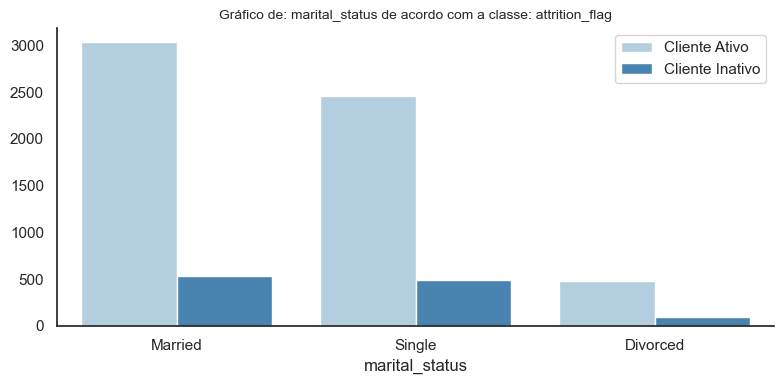

In [34]:
count_plt(df, 'marital_status', 'attrition_flag')

#### Faixa de renda

A maior parte dos clientes se encontram com a faixa de renda entre 60 mil e 80 mil dólares anuais, correspondendo a quase 40%. Cerca de 20% dos clientes tem uma renda inferior a 40 mil dólares. Por fim, 8.08% dos clientes recebem mais de 120 mil dólares por ano.

Olhando também para a classe que indica atividade da conta, temos que os clientes com a maior faixa de renda apresentam a maior proporção entre os clientes inativos com quase 18%. Os clientes que recebem entre 60 mil e 80 mil apresentam a menor proporção entre os clientes inativos.

In [35]:
percentagem('income_category')

Less than $40K - 39.43%
$40K - $60K - 19.94%
$80K - $120K - 16.98%
$60K - $80K - 15.58%
$120K + - 8.08%


In [36]:
tabela('income_category')

Existing Customer - $60K - $80K - 86.85%
Existing Customer - $40K - $60K - 85.55%
Existing Customer - $80K - $120K - 84.28%
Existing Customer - Less than $40K - 83.06%
Existing Customer - $120K + - 82.17%
Attrited Customer - $120K + - 17.83%
Attrited Customer - Less than $40K - 16.94%
Attrited Customer - $80K - $120K - 15.72%
Attrited Customer - $40K - $60K - 14.45%
Attrited Customer - $60K - $80K - 13.15%


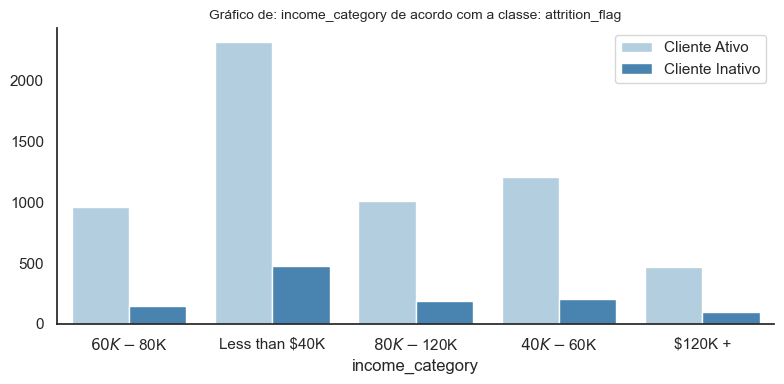

In [37]:
count_plt(df, 'income_category', 'attrition_flag')

#### Categoria do cartão de crédito

Mais de 93% dos clientes possuem o cartão mais básico da categoria Blue (Azul). 0.16% possuem o cartão de categoria mais alto, o platinum. Quando observamos essa categoria de acordo com a atividade da conta, os clientes de cartões platinum representam a maior proporção entre os inativos. Já os clientes com cartão Blue possuem a menor proporção, 15.67%.

In [38]:
percentagem('card_category')

Blue - 93.18%
Silver - 5.52%
Gold - 1.14%
Platinum - 0.16%


In [39]:
tabela('card_category')

Existing Customer - Blue - 84.33%
Existing Customer - Gold - 83.95%
Existing Customer - Silver - 83.89%
Existing Customer - Platinum - 72.73%
Attrited Customer - Platinum - 27.27%
Attrited Customer - Silver - 16.11%
Attrited Customer - Gold - 16.05%
Attrited Customer - Blue - 15.67%


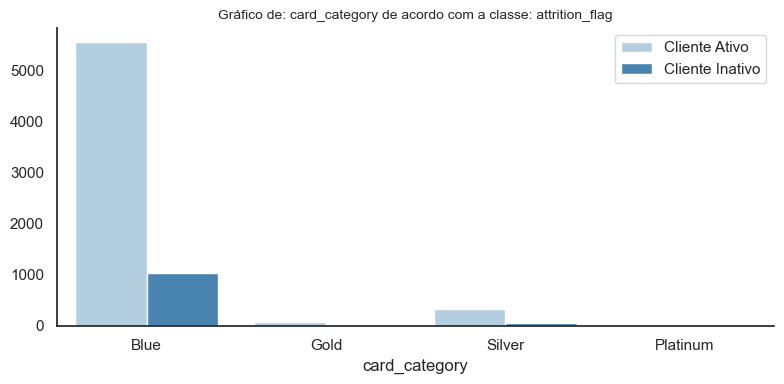

In [40]:
count_plt(df, 'card_category', 'attrition_flag')

#### Número de dependentes

O número médio de dependentes de cada cliente é de 2.34 sendo que a quantidade de dependentes que mais se repete por cliente é três sendo 27.24% do total. Apenas 4.02% dos clientes não possuem dependentes.

Considerando o estado da conta do cliente, clientes com três dependentes possuem a maior proporção de clientes inativos com 17.06%. Já clientes com um dependente possuem a menor probabilidade com 14.44%.

In [41]:
calculo_informacoes(df['dependent_count'])

O valor mínimo da variável é: 0
O valor máximo da variável é: 5
O valor médio é: 2.34
O valor mediano é: 2.0
O valor moda é: 3
O coeficiente de Assimetria é: -0.023956432278156428
O coeficiente de Curtose é: -0.6645310693313284
Esse é o p-valor do teste de Shapiro-Wilk: 0.0


In [42]:
percentagem('dependent_count')

3 - 27.24%
2 - 26.55%
1 - 17.99%
4 - 15.21%
0 - 8.98%
5 - 4.02%


In [43]:
tabela('dependent_count')

Existing Customer - 1 - 85.56%
Existing Customer - 5 - 84.91%
Existing Customer - 2 - 84.84%
Existing Customer - 0 - 84.12%
Existing Customer - 4 - 84.12%
Existing Customer - 3 - 82.94%
Attrited Customer - 3 - 17.06%
Attrited Customer - 0 - 15.88%
Attrited Customer - 4 - 15.88%
Attrited Customer - 2 - 15.16%
Attrited Customer - 5 - 15.09%
Attrited Customer - 1 - 14.44%


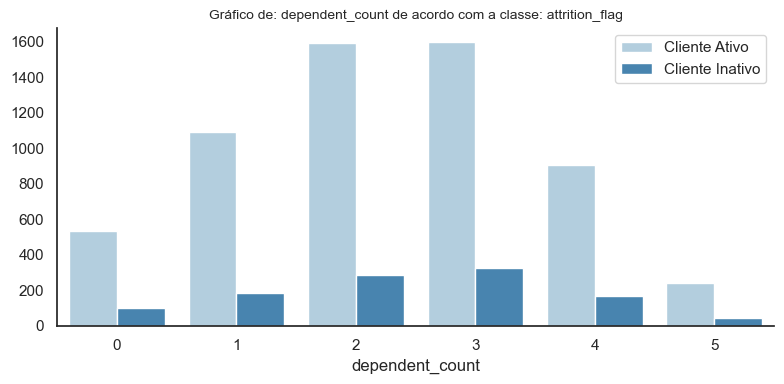

In [44]:
count_plt(df, 'dependent_count', 'attrition_flag')

#### Fidelidade do cliente

Essa variável indica quantos meses o indivíduo é cliente do banco. Em média os clientes tem 36 meses de relação com o banco, a mediana e a moda também é 36. O boxplot não apresenta valores muito distintos quando separamos pelo estado de atividade do cliente. Por fim, o teste de Kruskall-Wallis não apresenta evidências de que as distribuições sejam diferentes.

In [45]:
calculo_informacoes(df['months_book'])

O valor mínimo da variável é: 13
O valor máximo da variável é: 56
O valor médio é: 35.98
O valor mediano é: 36.0
O valor moda é: 36
O coeficiente de Assimetria é: -0.08083430596121897
O coeficiente de Curtose é: 0.3085660719290746
Esse é o p-valor do teste de Shapiro-Wilk: 4.4658920582654825e-31


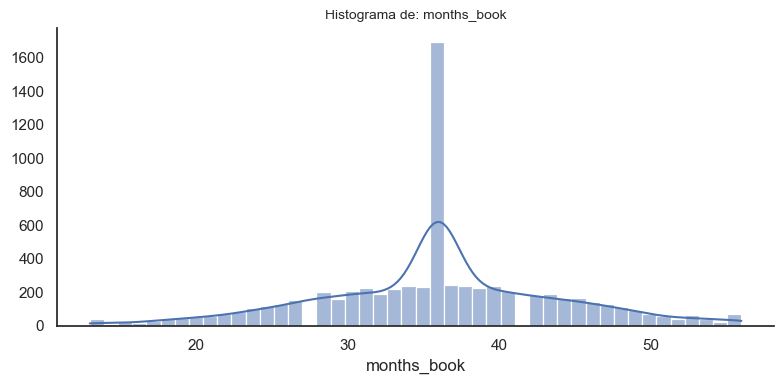

In [46]:
histograma_plt(df, 'months_book')

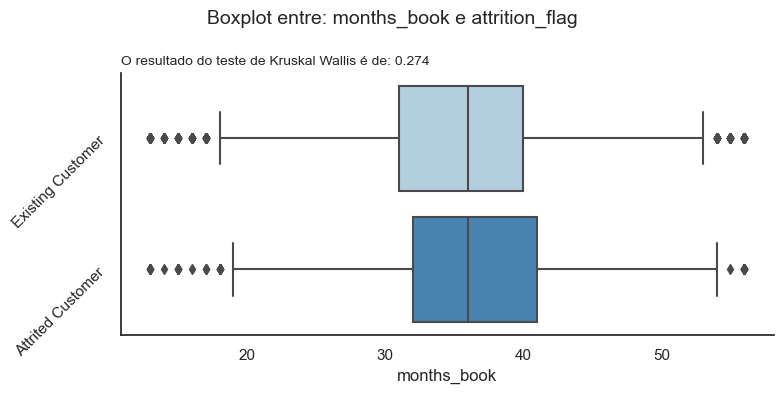

In [47]:
box_plt(df, 'months_book', 'attrition_flag')

#### Número de produtos do banco que o cliente possui

Os clientes podem ter entre um e seis produtos do banco. O valor médio é de 3.82 por cliente enquanto o valor mais comum é o de três produtos por cliente com quase 23% dos clientes com três produtos. Há cerca de 9% de clientes que possuem apenas um produto e 18% de clientes com o número máximo de produtos que é seis.

Considerando o estado da conta, clientes com quatro produtos representam a maior proporção entre os clientes ativos com quase 90%. Por outro lado, quase 28% dos clientes com dois produtos estão entre os inativos sendo a maior proporção verificada para essa categoria.

In [48]:
calculo_informacoes(df['total_relationship_count'])

O valor mínimo da variável é: 1
O valor máximo da variável é: 6
O valor médio é: 3.82
O valor mediano é: 4.0
O valor moda é: 3
O coeficiente de Assimetria é: -0.17511433195585607
O coeficiente de Curtose é: -0.9853512429644367
Esse é o p-valor do teste de Shapiro-Wilk: 0.0


In [49]:
percentagem('total_relationship_count')

3 - 22.84%
5 - 19.25%
4 - 19.07%
6 - 18.02%
2 - 11.98%
1 - 8.85%


In [50]:
tabela('total_relationship_count')

Existing Customer - 4 - 89.56%
Existing Customer - 6 - 88.95%
Existing Customer - 5 - 88.26%
Existing Customer - 3 - 82.87%
Existing Customer - 1 - 74.8%
Existing Customer - 2 - 72.17%
Attrited Customer - 2 - 27.83%
Attrited Customer - 1 - 25.2%
Attrited Customer - 3 - 17.13%
Attrited Customer - 5 - 11.74%
Attrited Customer - 6 - 11.05%
Attrited Customer - 4 - 10.44%


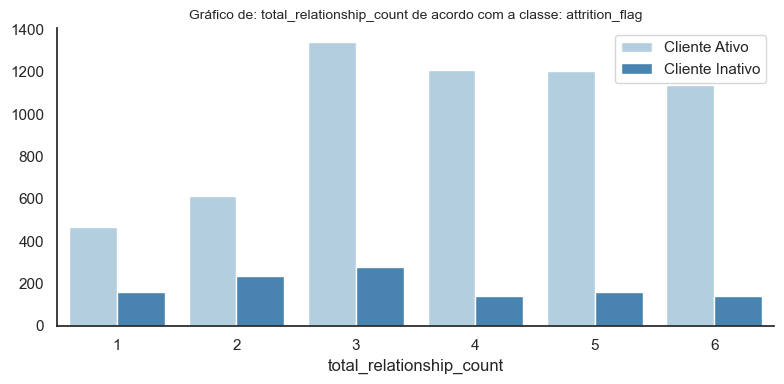

In [51]:
count_plt(df, 'total_relationship_count', 'attrition_flag')

#### Meses inativos no último ano

Essa variável indica a quantidade de meses em que o cliente esteve sem movimentar a conta nos últimos doze meses. O valor médio é de 2.34 meses. Cerca de 38% dos clientes ficaram três meses sem movimentar a conta. Nos extremos, 1.06% dos clientes não movimentaram por seis meses e 0.27% dos clientes não ficaram sem movimentar a conta.

In [52]:
calculo_informacoes(df['months_inactive_12_mon'])

O valor mínimo da variável é: 0
O valor máximo da variável é: 6
O valor médio é: 2.34
O valor mediano é: 2.0
O valor moda é: 3
O coeficiente de Assimetria é: 0.5952157240458532
O coeficiente de Curtose é: 1.050032944886833
Esse é o p-valor do teste de Shapiro-Wilk: 0.0


In [53]:
percentagem('months_inactive_12_mon')

3 - 38.47%
2 - 32.76%
1 - 21.54%
4 - 4.08%
5 - 1.82%
6 - 1.06%
0 - 0.27%


In [54]:
tabela('months_inactive_12_mon')

Existing Customer - 1 - 95.74%
Existing Customer - 6 - 85.33%
Existing Customer - 2 - 85.0%
Existing Customer - 5 - 82.95%
Existing Customer - 3 - 79.07%
Existing Customer - 4 - 69.55%
Existing Customer - 0 - 52.63%
Attrited Customer - 0 - 47.37%
Attrited Customer - 4 - 30.45%
Attrited Customer - 3 - 20.93%
Attrited Customer - 5 - 17.05%
Attrited Customer - 2 - 15.0%
Attrited Customer - 6 - 14.67%
Attrited Customer - 1 - 4.26%


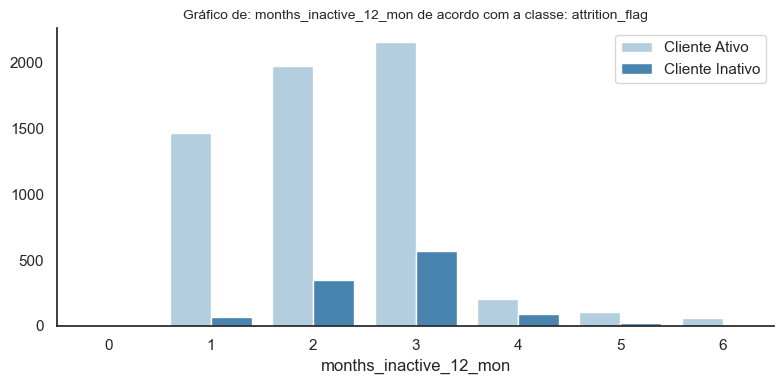

In [55]:
count_plt(df, 'months_inactive_12_mon', 'attrition_flag')

#### Contato pelo cliente

Essa variável indica a quantidade de vezes que o cliente entrou em contato com o banco nos últimos doze meses. O número médio é de 2.45 contatos por ano. 33.24% dos clientes entraram três vezes em contato no último ano, enquanto 4% dos clientes não entraram em contato. 0.42% dos clientes entraram seis vezes em contato.

Nessa variável observamos um padrão interessante. Dos clientes que entraram seis vezes em contato no último ano, 100% deles ficaram com a conta inativa. Além disso, há uma relação clara de que quanto maior o número de contatos, maior a proporção de clientes inativos. Essa variável se apresenta como uma forte candidata a ser uma boa preditora.

In [56]:
calculo_informacoes(df['contacts_count_12_mon'])

O valor mínimo da variável é: 0
O valor máximo da variável é: 6
O valor médio é: 2.45
O valor mediano é: 2.0
O valor moda é: 3
O coeficiente de Assimetria é: -0.015391956330003127
O coeficiente de Curtose é: -0.04359837832660096
Esse é o p-valor do teste de Shapiro-Wilk: 0.0


In [57]:
percentagem('contacts_count_12_mon')

3 - 33.24%
2 - 32.07%
1 - 14.53%
4 - 13.81%
0 - 4.07%
5 - 1.85%
6 - 0.42%


In [58]:
tabela('contacts_count_12_mon')

Attrited Customer - 6 - 100.0%
Existing Customer - 0 - 98.26%
Existing Customer - 1 - 92.23%
Existing Customer - 2 - 88.07%
Existing Customer - 3 - 80.08%
Existing Customer - 4 - 78.02%
Existing Customer - 5 - 67.18%
Attrited Customer - 5 - 32.82%
Attrited Customer - 4 - 21.98%
Attrited Customer - 3 - 19.92%
Attrited Customer - 2 - 11.93%
Attrited Customer - 1 - 7.77%
Attrited Customer - 0 - 1.74%


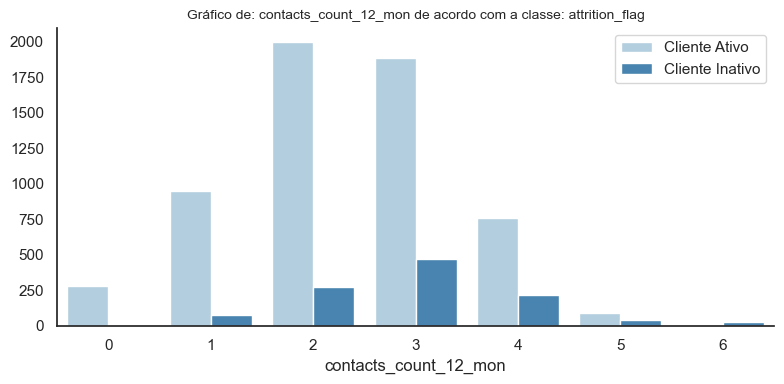

In [59]:
count_plt(df, 'contacts_count_12_mon', 'attrition_flag')

#### Limite do cartão de crédito

O valor médio do limite do cartão de crédito é de 8492.77 dólares. A maioria dos clientes tem um limite de 1438.30 dólares. A distribuição da variável é inclinada à esquerda confirmado pelo valor do coeficiente de assimetria que é 1.70.

O boxplot da variável de acordo com o estado da conta do cliente apresenta valores de mediana muito próximos, sendo um pouco inferior para clientes inativos. A distribuição de valores não parece muito diferente levando em consideração as duas classes que indicam a atividade da conta. Contudo, o teste de Kruskall-Wallis nos dá evidências de que as distribuições são diferentes devido ao valor de seu p-valor ser muito próximo de zero, possibilitando rejeitar a hipótese nula que diz que as distribuições são iguais.

In [60]:
calculo_informacoes(df['credit_limit'])

O valor mínimo da variável é: 1438.3
O valor máximo da variável é: 34516.0
O valor médio é: 8492.77
O valor mediano é: 4287.0
O valor moda é: 1438.3
O coeficiente de Assimetria é: 1.7035723761391386
O coeficiente de Curtose é: 1.9103202442729263
Esse é o p-valor do teste de Shapiro-Wilk: 0.0


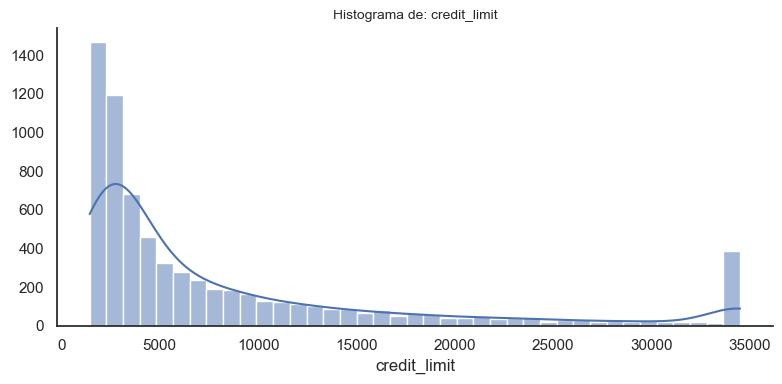

In [61]:
histograma_plt(df, 'credit_limit')

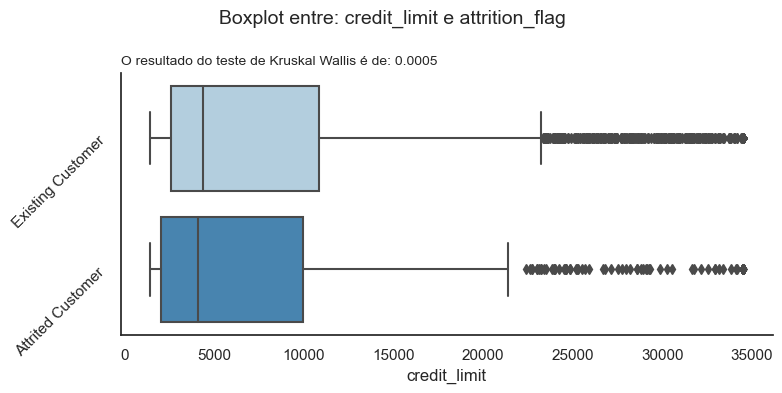

In [62]:
box_plt(df, 'credit_limit', 'attrition_flag')

#### Saldo rotativo do cartão

Essa variável indica quanto o cliente deixou de pagar do cartão no período correto. A maioria dos clientes pagam o valor integral da fatura. O valor médio, no entanto, é de 1167.50. Apesar de uma grande quantidade de zeros na distribuição, o coeficiente de assimetria indica uma distribuição simétrica.

Olhando para o boxplot relacionando a variável com o estado da conta, podemos observar que os clientes ativos possuem uma mediana maior que os clientes inativos, inclusive maior que o valor correspondente ao terceiro quartil da distribuição dos valores para clientes inativos. O teste de Kruskall-Wallis nos da evidências de que as distribuições são diferentes.

In [63]:
calculo_informacoes(df['total_revolving_bal'])

O valor mínimo da variável é: 0
O valor máximo da variável é: 2517
O valor médio é: 1167.5
O valor mediano é: 1282.0
O valor moda é: 0
O coeficiente de Assimetria é: -0.15653699877316568
O coeficiente de Curtose é: -1.1308276362939704
Esse é o p-valor do teste de Shapiro-Wilk: 0.0


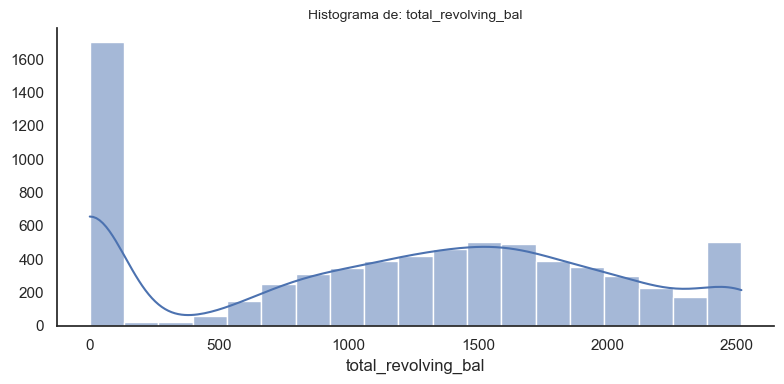

In [64]:
histograma_plt(df, 'total_revolving_bal')

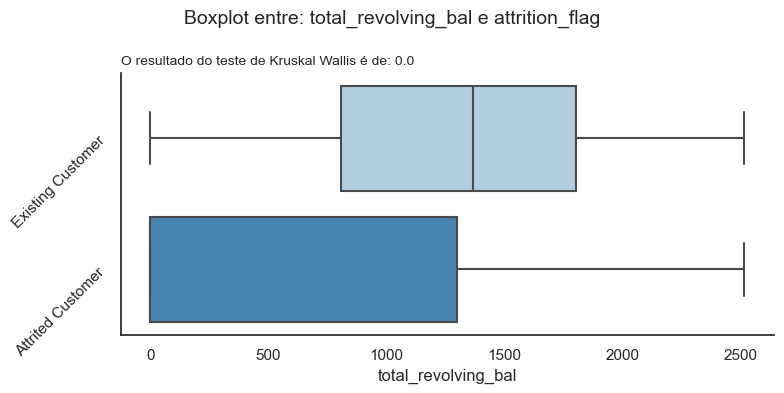

In [65]:
box_plt(df, 'total_revolving_bal', 'attrition_flag')

#### Linha de crédito aberta nos últimos 12 meses

Essa variável indica o valor de crédito aberto para o cliente nos últimos 12 meses. O valor médio é de cerca de 7325 dólares enquanto o valor mediano é de 3250 dólares. Quando olhamos o boxplot percebemos que a distribuição possui muitos outliers e o teste de Kruskall-Wallis nos apresenta evidências de que as distribuições são diferentes.

In [66]:
calculo_informacoes(df['avg_open_to_buy'])

O valor mínimo da variável é: 3.0
O valor máximo da variável é: 34516.0
O valor médio é: 7325.27
O valor mediano é: 3250.0
O valor moda é: 1438.3
O coeficiente de Assimetria é: 1.7003295364614786
O coeficiente de Curtose é: 1.9060473849900315
Esse é o p-valor do teste de Shapiro-Wilk: 0.0


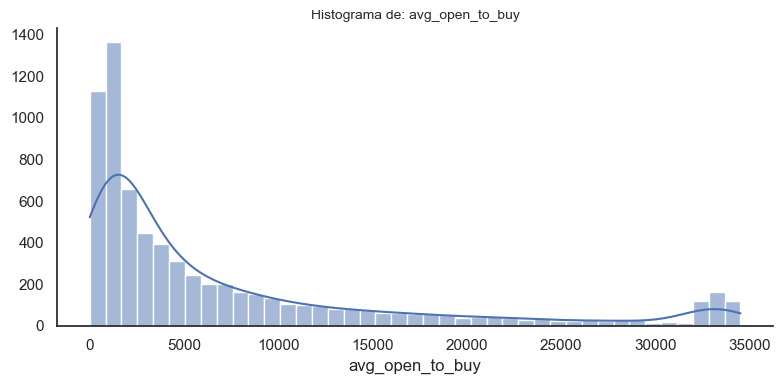

In [67]:
histograma_plt(df, 'avg_open_to_buy')

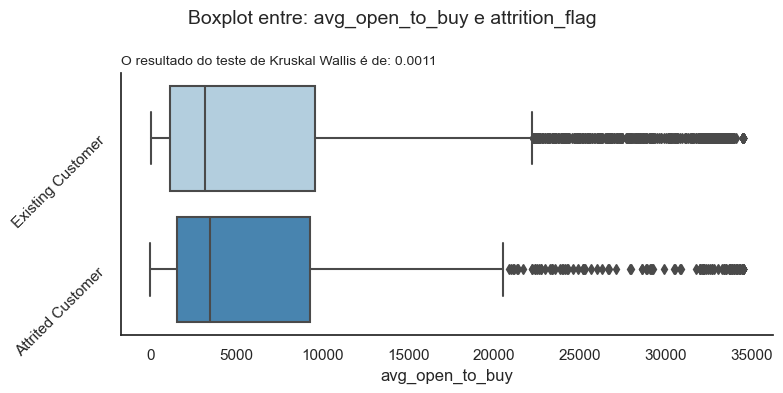

In [68]:
box_plt(df, 'avg_open_to_buy', 'attrition_flag')

#### Mudança no valor transacionado entre Q1 e Q4

Essa variável indica a mudança no valor transacionado pelo cliente entre o primeiro trimestre e o último. O valor médio indica uma mudança positiva de 0.76. O teste de Shapiro-Wilk apresenta evidências de que a distribuição é normal. O boxplot apresenta um padrão diferente para a variável quando consideramos que o cliente é ativo, tendo muito mais outliers para estes. O teste de Kruskall-Wallis apresenta evidência de que as distribuições são diferentes.

In [69]:
calculo_informacoes(df['total_amt_change_Q4_Q1'])

O valor mínimo da variável é: 0.0
O valor máximo da variável é: 3.397
O valor médio é: 0.76
O valor mediano é: 0.735
O valor moda é: 0.791
O coeficiente de Assimetria é: 1.820480063700999
O coeficiente de Curtose é: 10.683055483872188
Esse é o p-valor do teste de Shapiro-Wilk: 0.0


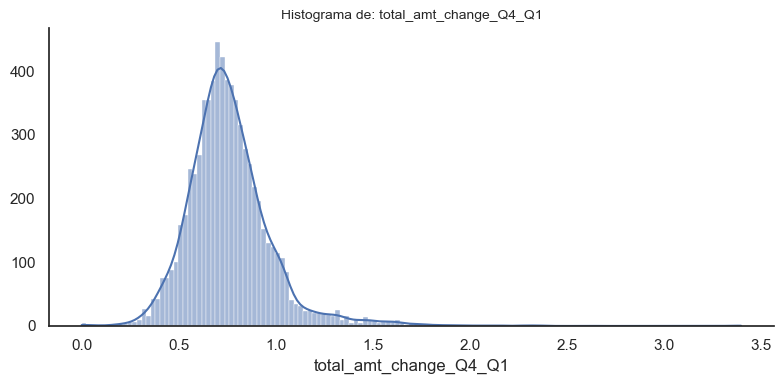

In [70]:
histograma_plt(df, 'total_amt_change_Q4_Q1')

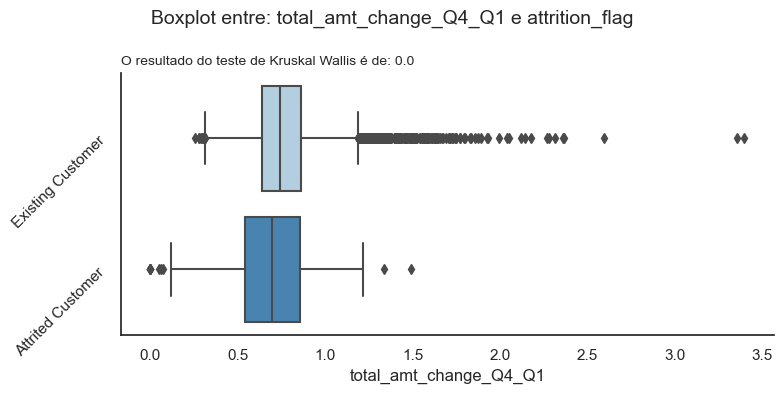

In [71]:
box_plt(df, 'total_amt_change_Q4_Q1', 'attrition_flag')

#### Valor transacionado nos últimos 12 meses

A variável indica o valor transacionado pelo cliente no último ano. O valor médio é de cerca de 4400 dólares. A distribuição é quase bi-modal em torno de 2000 dólares e 4000 dólares. O boxplot apresenta um valor mediano muito superior para clientes ativos. O teste de Kruskall-Wallis nos dá evidências para rejetiar a hipótese nula de que as distribuições não são diferentes.

In [72]:
calculo_informacoes(df['total_trans_amt'])

O valor mínimo da variável é: 510
O valor máximo da variável é: 17995
O valor médio é: 4394.3
O valor mediano é: 3831.0
O valor moda é: 3906
O coeficiente de Assimetria é: 2.017977203905561
O coeficiente de Curtose é: 3.7100903447276568
Esse é o p-valor do teste de Shapiro-Wilk: 0.0


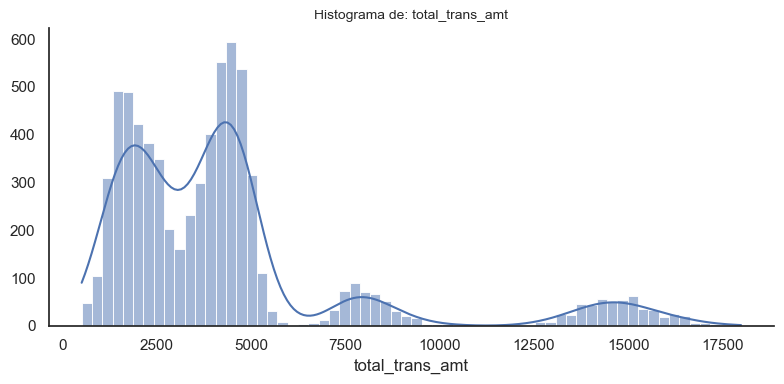

In [73]:
histograma_plt(df, 'total_trans_amt')

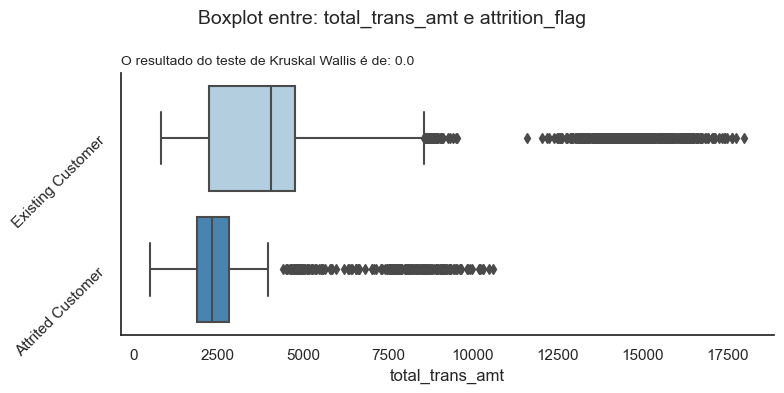

In [74]:
box_plt(df, 'total_trans_amt', 'attrition_flag')

#### Transações com o cartão de crédito

Essa variável mostra quantas compras o cliente fez com o cartão de crédito nos últimos doze meses. O valor médio é de 64.5 transações no ano e o valor máximo chega a ser de 134 transações. O valor que mais se repete é o de 75 transações em um ano, cerca de 6.25 transações por mês.

Observando o boxplot, notamos um padrão que indica que clientes ativos possuem uma quantidade maior de transações por ano. A mediana de transações para clientes ativos é de cerca de 70 transações por ano, enquanto para clientes inativos é de cerca de 40 transações por ano. Novamente, o teste de Kruskall-Wallis nos dá evidências de que as distribuições são diferentes.

In [75]:
calculo_informacoes(df['total_trans_ct'])

O valor mínimo da variável é: 10
O valor máximo da variável é: 134
O valor médio é: 64.5
O valor mediano é: 67.0
O valor moda é: 75
O coeficiente de Assimetria é: 0.17116726512215277
O coeficiente de Curtose é: -0.40576086895744945
Esse é o p-valor do teste de Shapiro-Wilk: 1.0263473266634019e-27


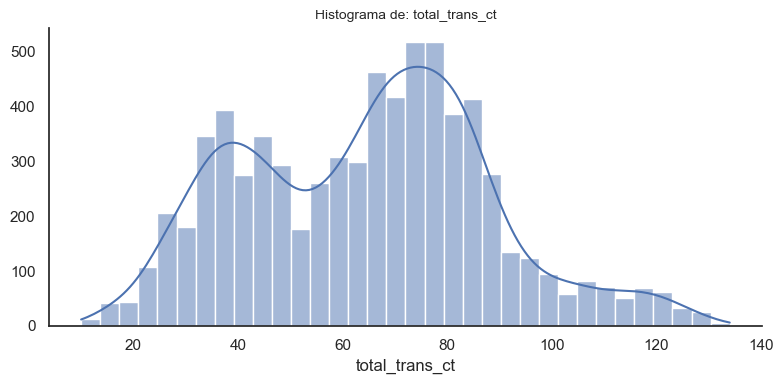

In [76]:
histograma_plt(df, 'total_trans_ct')

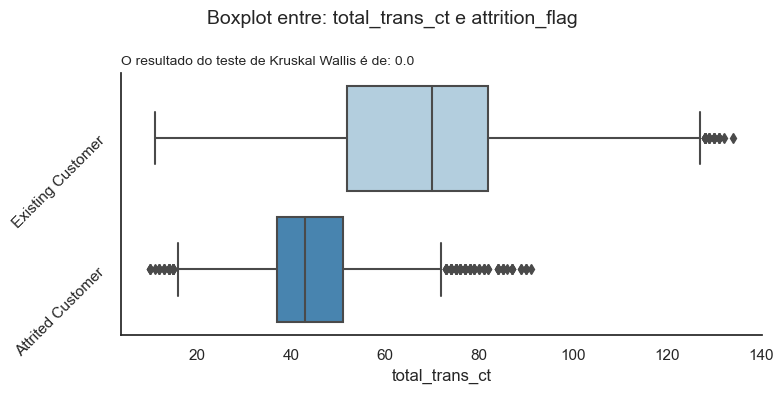

In [77]:
box_plt(df, 'total_trans_ct', 'attrition_flag')

#### Variação nas transações com cartão de crédito

Essa variável indica variação na quantidade de transações com cartão de crédito entre o primeiro trimestre e o quarto trimestre do ano. Em outras palavras, indica se os clientes passaram a utilizar muito ou pouco o seu cartão nos últimos doze meses, ou mesmo se manteve o padrão.

O valor médio é de 0.71 e a mediana é de 0.70 indicando que a distribuição é normal, confirmado pelo teste de Shapiro-Wilk. O boxplot indica que os clientes ativos apresentam uma variação maior na quantidade transacionada no período selecionado. O teste de Kruskall-Wallis fornece evidências de que as distribuições são diferentes.

In [78]:
calculo_informacoes(df['total_ct_change_Q4_Q1'])

O valor mínimo da variável é: 0.0
O valor máximo da variável é: 3.714
O valor médio é: 0.71
O valor mediano é: 0.7
O valor moda é: 0.667
O coeficiente de Assimetria é: 2.1685117415012534
O coeficiente de Curtose é: 16.880926050236482
Esse é o p-valor do teste de Shapiro-Wilk: 0.0


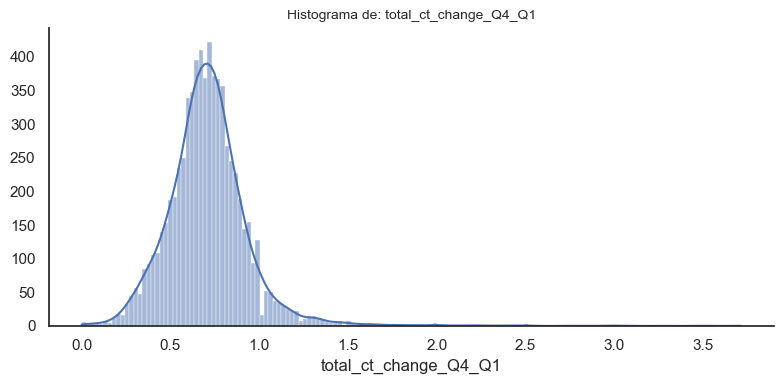

In [79]:
histograma_plt(df, 'total_ct_change_Q4_Q1')

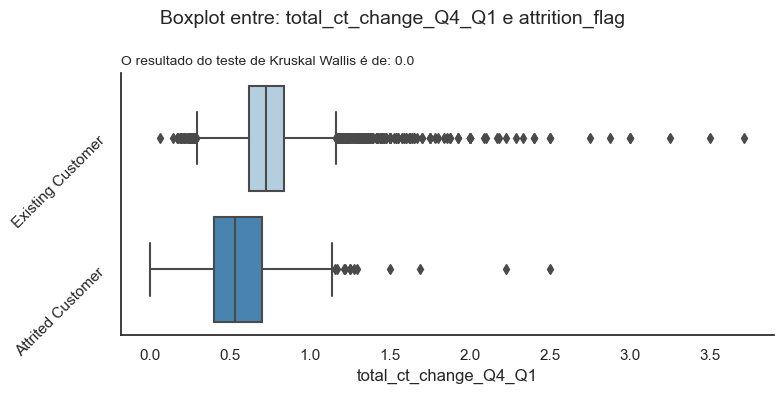

In [80]:
box_plt(df, 'total_ct_change_Q4_Q1', 'attrition_flag')

#### Taxa de utilização do cartão de crédito

A taxa de utilização indica a porcentagem de utilização do cartão de crédito pelo cliente. O valor médio é de 0.28 e a maioria dos clientes não utilizaram o cartão, como é possível ver no histograma.

O boxplot entre a taxa de utilização e a variável que indica se o cliente é ativo ou inativo mostra que a utilização por parte de clientes ativos é muito superior em comparação com a utilização de clientes inativos. O teste de Kruskall-Wallis, mais uma vez, fornece evidência de que as distribuições são diferentes.

In [81]:
calculo_informacoes(df['avg_utilization_ratio'])

O valor mínimo da variável é: 0.0
O valor máximo da variável é: 0.999
O valor médio é: 0.28
O valor mediano é: 0.186
O valor moda é: 0.0
O coeficiente de Assimetria é: 0.6739636294617922
O coeficiente de Curtose é: -0.864121789450004
Esse é o p-valor do teste de Shapiro-Wilk: 0.0


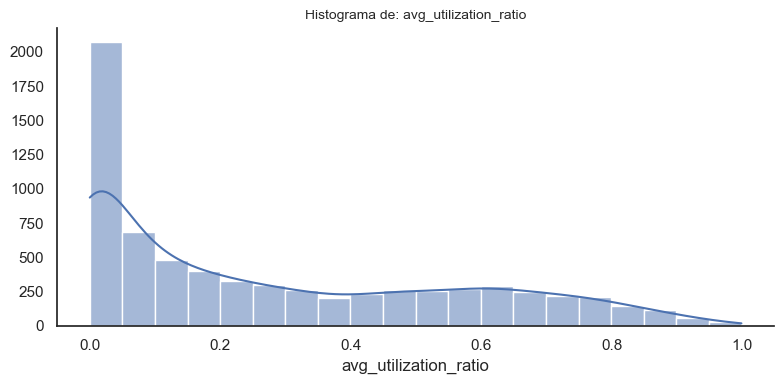

In [82]:
histograma_plt(df, 'avg_utilization_ratio')

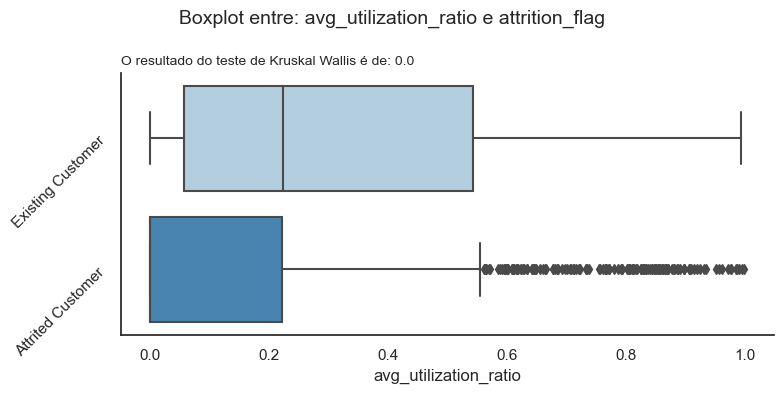

In [83]:
box_plt(df, 'avg_utilization_ratio', 'attrition_flag')

## Variáveis que precisam ser transformadas!

### Faremos One-Hot Encoding

In [84]:
colunas = ['gender', 'dependent_count', 'education_level', 'marital_status', 'income_category', 'card_category']

In [85]:
df = pd.get_dummies(df, columns = colunas)

### attrition_flag

In [86]:
# Existing Customer == 0; Atrited Customer == 1
df['attrition_flag'] = np.where(df['attrition_flag'] == 'Existing Customer', 0, 1)

### Alterando a escala das variáveis numéricas

Utilizando a função RobustScaler() que leva em consideração observações outliers.

In [87]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

In [89]:
print('Tamanho do dataset de treino: ' + str(len(X_train)))
print('Tamanho do dataset de teste: ' + str(len(X_test)))

Tamanho do dataset de treino: 4956
Tamanho do dataset de teste: 2125


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7081 entries, 0 to 10126
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   attrition_flag                  7081 non-null   int32  
 1   age                             7081 non-null   int64  
 2   months_book                     7081 non-null   int64  
 3   total_relationship_count        7081 non-null   int64  
 4   months_inactive_12_mon          7081 non-null   int64  
 5   contacts_count_12_mon           7081 non-null   int64  
 6   credit_limit                    7081 non-null   float64
 7   total_revolving_bal             7081 non-null   int64  
 8   avg_open_to_buy                 7081 non-null   float64
 9   total_amt_change_Q4_Q1          7081 non-null   float64
 10  total_trans_amt                 7081 non-null   int64  
 11  total_trans_ct                  7081 non-null   int64  
 12  total_ct_change_Q4_Q1           7

In [91]:
colunas_norm = ['age', 'months_book', 'credit_limit', 'total_revolving_bal', 'avg_open_to_buy',
                'total_amt_change_Q4_Q1', 'total_trans_amt', 'total_trans_ct', 'total_ct_change_Q4_Q1',
                'avg_utilization_ratio']

In [92]:
scaler = preprocessing.RobustScaler().fit(X_train[colunas_norm])

In [93]:
X_train[colunas_norm] = scaler.transform(X_train[colunas_norm])
X_test[colunas_norm] = scaler.transform(X_test[colunas_norm])

### Realizando o Balanceamento das Classes com SMOTE

In [94]:
oversampled = SMOTE(random_state = 8)
X_train, y_train = oversampled.fit_resample(X_train, y_train)

## Pré-Processamento Finalizado

## Machine Learning

### Métricas de avaliação dos modelos

In [95]:
def metricas_avaliacao(x, y, previsao, modelo, versao):
    # mudei o y_test do acuracia pra y
    acuracia = round(accuracy_score(y, previsao), 4)
    roc_auc = metrics.roc_auc_score(y, previsao)
    print('Esse é o ' + versao + ' do projeto!')
    print('-' * 58)
    print('A acurácia do modelo de ' + modelo + ' é: ' + str(round(acuracia, 4)))
    print('O valor ROC-AUC do modelo de ' + modelo + ' é: ' + str(round(roc_auc, 4)))
    print('-' * 58)
    mat_confusao = metrics.confusion_matrix(y, previsao)
    mat_confusao = pd.DataFrame(mat_confusao)
    print(mat_confusao)
    print('-' * 58)
    nome_target = ['Cliente Ativo', 'Cliente Inativo']
    print(classification_report(y, previsao, target_names = nome_target))
    

In [96]:
def roc_auc_curva(y, previsao, modelo):
    fpr, tpr, thresholds = metrics.roc_curve(y, previsao)
    roc_auc = metrics.roc_auc_score(y, previsao)
    plt.title('ROC Curve do modelo: ' + modelo + '!')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

In [97]:
dicionario_resultados = []
def resultados_modelos(test_y, previsao, nome_modelo):
    acuracia_res = round(accuracy_score(test_y, previsao), 4)
    roc_auc_res = round(metrics.roc_auc_score(test_y, previsao), 4)
    dicionario_res = {'modelo' : nome_modelo, 'acuracia' : acuracia_res, 'roc_auc' : roc_auc_res}
    dicionario_resultados.append(dicionario_res)
    global df_resultados
    df_resultados = pd.DataFrame(dicionario_resultados)
    return df_resultados

### Primeiro modelo: Regressão logística!

In [98]:
C = [0.01, 0.1, 1, 10, 100, 1000]
penalty = ['none', 'l1', 'l2']

In [99]:
resultados = []
for c in C:
    for penal in penalty:
        if(penal == 'l1'):
            modelo = LogisticRegression(C = c, penalty = penal, solver = 'liblinear').fit(X_train, y_train)
            previsao = modelo.predict(X_test)
            acuracia = round(accuracy_score(y_test, previsao), 4)
            roc_auc = round(metrics.roc_auc_score(y_test, previsao), 4)
            dicionario = {'modelo' : [c, penal], 'acuracia' : acuracia, 'roc_auc' : roc_auc}
            resultados.append(dicionario)
            resultados_v1 = pd.DataFrame(resultados)
        else:
            modelo = LogisticRegression(C = c, penalty = penal, solver = 'lbfgs').fit(X_train, y_train)
            previsao = modelo.predict(X_test)
            acuracia = round(accuracy_score(y_test, previsao), 4)
            roc_auc = round(metrics.roc_auc_score(y_test, previsao), 4)
            dicionario = {'modelo' : [c, penal], 'acuracia' : acuracia, 'roc_auc' : roc_auc}
            resultados.append(dicionario)
            resultados_v1 = pd.DataFrame(resultados)

In [ ]:
resultados_v1.head(4)

#### C = 0.01 e penalty = 'l2' é o modelo com melhor equilibrio entre Acuracia e ROC!

In [101]:
modelo_v1 = LogisticRegression(C = 0.01, penalty = 'l2').fit(X_train, y_train)
previsao_v1 = modelo_v1.predict(X_test)

In [102]:
metricas_avaliacao(X_test, y_test, previsao_v1, 'Regressão Logística', 'primeiro modelo')

Esse é o primeiro modelo do projeto!
----------------------------------------------------------
A acurácia do modelo de Regressão Logística é: 0.8772
O valor ROC-AUC do modelo de Regressão Logística é: 0.8128
----------------------------------------------------------
      0    1
0  1632  171
1    90  232
----------------------------------------------------------
                 precision    recall  f1-score   support

  Cliente Ativo       0.95      0.91      0.93      1803
Cliente Inativo       0.58      0.72      0.64       322

       accuracy                           0.88      2125
      macro avg       0.76      0.81      0.78      2125
   weighted avg       0.89      0.88      0.88      2125



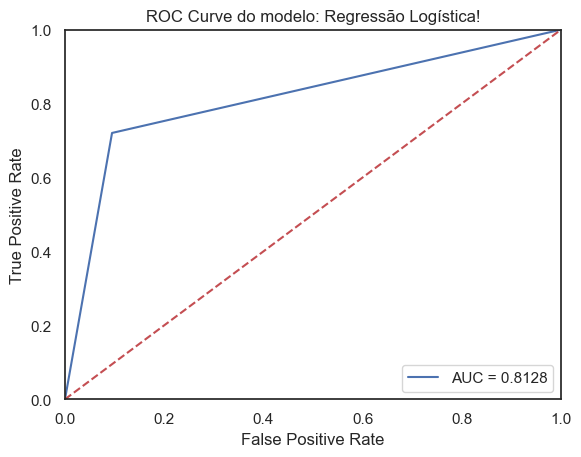

In [103]:
roc_auc_curva(y_test, previsao_v1, 'Regressão Logística')

In [104]:
resultados_modelos(y_test, previsao_v1, 'Regressão Logística')

,modelo,acuracia,roc_auc
0,Regressão Logística,0.8772,0.8128


### Segundo modelo: Naive Bayes

In [105]:
classificador = [GaussianNB(), BernoulliNB()]

In [106]:
resultados = []
for c in classificador:
    modelo = c.fit(X_train, y_train)
    previsao = modelo.predict(X_test)
    acuracia = round(accuracy_score(y_test, previsao), 4)
    roc_auc = round(metrics.roc_auc_score(y_test, previsao), 4)
    dicionario = {'modelo' : c, 'acuracia' : acuracia, 'roc_auc' : roc_auc}
    resultados.append(dicionario)
    resultados_v2 = pd.DataFrame(resultados)

In [ ]:
resultados_v2

#### Melhor modelo é o Bernoulli!

In [108]:
modelo_v2 = BernoulliNB().fit(X_train, y_train)
previsao_v2 = modelo_v2.predict(X_test)

In [109]:
metricas_avaliacao(X_test, y_test, previsao_v2, 'Naive Bayes', 'segundo modelo')

Esse é o segundo modelo do projeto!
----------------------------------------------------------
A acurácia do modelo de Naive Bayes é: 0.7976
O valor ROC-AUC do modelo de Naive Bayes é: 0.7494
----------------------------------------------------------
      0    1
0  1476  327
1   103  219
----------------------------------------------------------
                 precision    recall  f1-score   support

  Cliente Ativo       0.93      0.82      0.87      1803
Cliente Inativo       0.40      0.68      0.50       322

       accuracy                           0.80      2125
      macro avg       0.67      0.75      0.69      2125
   weighted avg       0.85      0.80      0.82      2125



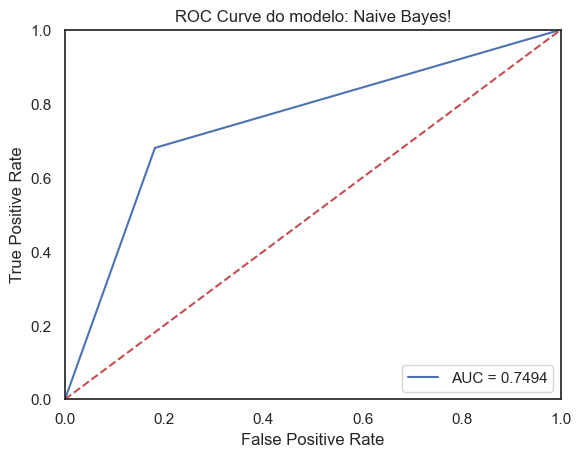

In [110]:
roc_auc_curva(y_test, previsao_v2, 'Naive Bayes')

In [111]:
resultados_modelos(y_test, previsao_v2, 'Naive Bayes')

,modelo,acuracia,roc_auc
0,Regressão Logística,0.8772,0.8128
1,Naive Bayes,0.7976,0.7494


### Terceiro Modelo: KNN

In [112]:
vizinhos = np.arange(1, 27, 2)

In [113]:
resultados = []
for k in vizinhos:
    modelo = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    previsao = modelo.predict(X_test)
    acuracia = round(accuracy_score(y_test, previsao), 4)
    roc_auc = round(metrics.roc_auc_score(y_test, previsao), 4)
    dicionario = {'modelo' : k, 'acuracia' : acuracia, 'roc_auc' : roc_auc}
    resultados.append(dicionario)
    resultados_v3 = pd.DataFrame(resultados)

In [ ]:
resultados_v3.head(4)

#### Melhor modelo com k = 3

In [115]:
modelo_v3 = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
previsao_v3 = modelo_v3.predict(X_test)

In [116]:
metricas_avaliacao(X_test, y_test, previsao_v3, 'KNN', 'terceiro modelo')

Esse é o terceiro modelo do projeto!
----------------------------------------------------------
A acurácia do modelo de KNN é: 0.8381
O valor ROC-AUC do modelo de KNN é: 0.8306
----------------------------------------------------------
      0    1
0  1517  286
1    58  264
----------------------------------------------------------
                 precision    recall  f1-score   support

  Cliente Ativo       0.96      0.84      0.90      1803
Cliente Inativo       0.48      0.82      0.61       322

       accuracy                           0.84      2125
      macro avg       0.72      0.83      0.75      2125
   weighted avg       0.89      0.84      0.85      2125



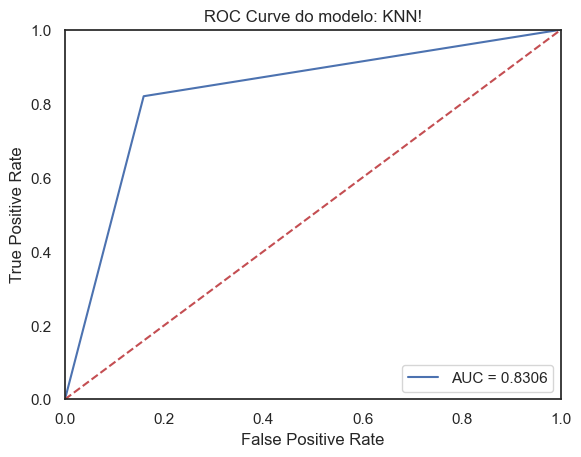

In [117]:
roc_auc_curva(y_test, previsao_v3, 'KNN')

In [118]:
resultados_modelos(y_test, previsao_v3, 'KNN')

,modelo,acuracia,roc_auc
0,Regressão Logística,0.8772,0.8128
1,Naive Bayes,0.7976,0.7494
2,KNN,0.8381,0.8306


### Quarto Modelo: Árvore de Decisão

In [119]:
criterio = ['gini', 'entropy']
max_dep = [3, 5, 7, 9, 11, 13, 15, 17, 19]

In [120]:
resultados = []
for c in criterio:
    for m in max_dep:
        modelo = tree.DecisionTreeClassifier(criterion = c, max_depth = m, random_state = 8).fit(X_train, y_train)
        previsao = modelo.predict(X_test)
        acuracia = round(accuracy_score(y_test, previsao), 4)
        roc_auc = round(metrics.roc_auc_score(y_test, previsao), 4)
        dicionario = {'modelo' : [c, m], 'acuracia' : acuracia, 'roc_auc' : roc_auc}
        resultados.append(dicionario)
        resultados_v4 = pd.DataFrame(resultados)

In [ ]:
resultados_v4.head(4)

#### Melhor modelo com classificador entropy e max depth = 11!

In [122]:
modelo_v4 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 11, random_state = 8).fit(X_train, y_train)
previsao_v4 = modelo_v4.predict(X_test)

In [123]:
metricas_avaliacao(X_test, y_test, previsao_v4, 'Decision Tree', 'quarto modelo')

Esse é o quarto modelo do projeto!
----------------------------------------------------------
A acurácia do modelo de Decision Tree é: 0.9318
O valor ROC-AUC do modelo de Decision Tree é: 0.9024
----------------------------------------------------------
      0    1
0  1703  100
1    45  277
----------------------------------------------------------
                 precision    recall  f1-score   support

  Cliente Ativo       0.97      0.94      0.96      1803
Cliente Inativo       0.73      0.86      0.79       322

       accuracy                           0.93      2125
      macro avg       0.85      0.90      0.88      2125
   weighted avg       0.94      0.93      0.93      2125



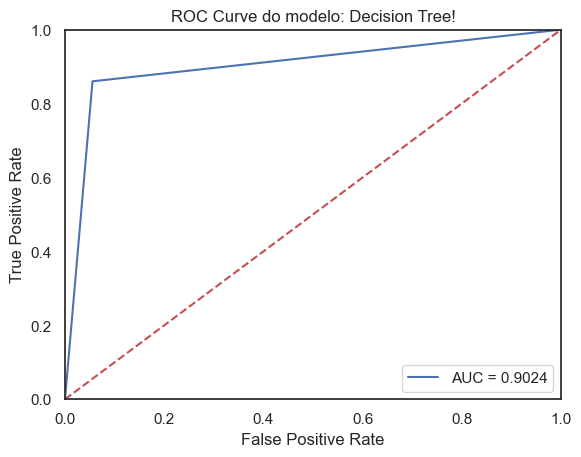

In [124]:
roc_auc_curva(y_test, previsao_v4, 'Decision Tree')

In [125]:
resultados_modelos(y_test, previsao_v4, 'Decision Tree')

,modelo,acuracia,roc_auc
0,Regressão Logística,0.8772,0.8128
1,Naive Bayes,0.7976,0.7494
2,KNN,0.8381,0.8306
3,Decision Tree,0.9318,0.9024


### Quinto Modelo: Random Forest

In [126]:
criterio = ['gini', 'entropy']
estimacoes = [50, 100, 500, 1000]
max_dep = [3, 5, 7, 9, 11, 13, 15, 17, 19, 20]

In [ ]:
resultados = []
for c in tq.tqdm(criterio):
    for num in estimacoes:
        for d in max_dep:
            modelo = RandomForestClassifier(criterion = c,
                                            n_estimators = num,
                                            max_depth = d,
                                            random_state = 8, n_jobs = 12).fit(X_train, y_train)
            previsao = modelo.predict(X_test)
            acuracia = round(accuracy_score(y_test, previsao), 4)
            roc_auc = round(metrics.roc_auc_score(y_test, previsao), 4)
            dicionario = {'modelo' : [c, num, d], 'acuracia' : acuracia, 'roc_auc' : roc_auc}
            resultados.append(dicionario)
            resultados_v5 = pd.DataFrame(resultados)

In [ ]:
resultados_v5.head(4)

#### Melhor modelo com entropy, 1000 estimacoes e max depth = 19!

In [129]:
modelo_v5 = RandomForestClassifier(criterion = 'entropy',
                                   n_estimators = 1000,
                                   max_depth = 19,
                                   random_state = 8, n_jobs = 12).fit(X_train, y_train)
previsao_v5 = modelo_v5.predict(X_test)

In [130]:
metricas_avaliacao(X_test, y_test, previsao_v5, 'Random Forest', 'quinto modelo')

Esse é o quinto modelo do projeto!
----------------------------------------------------------
A acurácia do modelo de Random Forest é: 0.9581
O valor ROC-AUC do modelo de Random Forest é: 0.9294
----------------------------------------------------------
      0    1
0  1750   53
1    36  286
----------------------------------------------------------
                 precision    recall  f1-score   support

  Cliente Ativo       0.98      0.97      0.98      1803
Cliente Inativo       0.84      0.89      0.87       322

       accuracy                           0.96      2125
      macro avg       0.91      0.93      0.92      2125
   weighted avg       0.96      0.96      0.96      2125



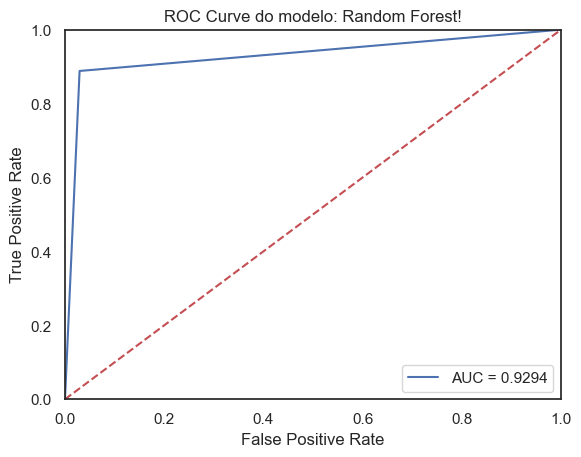

In [131]:
roc_auc_curva(y_test, previsao_v5, 'Random Forest')

In [132]:
resultados_modelos(y_test, previsao_v5, 'Random Forest')

,modelo,acuracia,roc_auc
0,Regressão Logística,0.8772,0.8128
1,Naive Bayes,0.7976,0.7494
2,KNN,0.8381,0.8306
3,Decision Tree,0.9318,0.9024
4,Random Forest,0.9581,0.9294


### Sexto Modelo: Random Forest para selecionar as variáveis depois aplicar Random Forest novamente!

#### Obtendo as variáveis com Random Forest

In [133]:
selecao_variaveis = RandomForestClassifier(criterion = 'entropy',
                                           n_estimators = 1000,
                                           max_depth = 19,
                                           random_state = 8, n_jobs = 12).fit(X_train, y_train)

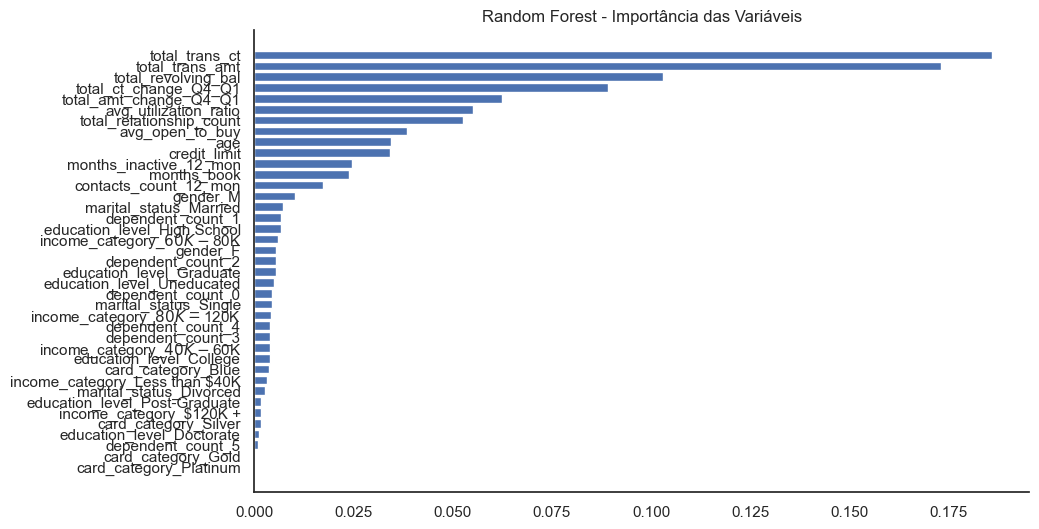

In [134]:
fig, ax = plt.subplots(figsize = (10, 6))
rearrumando = selecao_variaveis.feature_importances_.argsort()
plt.barh(selecao_variaveis.feature_names_in_[rearrumando], selecao_variaveis.feature_importances_[rearrumando])
plt.title('Random Forest - Importância das Variáveis')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show();

#### Selecionaremos as variáveis:

total_trans_ct, total_revolving_bal, total_ct_change_Q4_Q1, months_inactive_12_mon, total_relationship_count, credit_limit e contacts_count_12_mon

In [135]:
colunas_selecionadas = ['total_trans_ct', 'total_trans_amt', 'total_revolving_bal', 'total_ct_change_Q4_Q1',
                        'total_amt_change_Q4_Q1', 'avg_utilization_ratio', 'total_relationship_count',
                        'avg_open_to_buy', 'age', 'credit_limit', 'months_inactive_12_mon']

In [136]:
X_train_selecao = X_train[colunas_selecionadas]
X_test_selecao = X_test[colunas_selecionadas]

#### Construindo o modelo!

In [ ]:
criterio = ['gini', 'entropy']
estimacoes = [50, 100, 500, 1000]
max_dep = [3, 5, 7, 9, 11, 13, 15, 17, 19, 20]

In [ ]:
resultados = []
for c in tq.tqdm(criterio):
    for num in estimacoes:
        for d in max_dep:
            modelo = RandomForestClassifier(criterion = c,
                                            n_estimators = num,
                                            max_depth = d,
                                            random_state = 8, n_jobs = 10).fit(X_train_selecao, y_train)
            previsao = modelo.predict(X_test_selecao)
            acuracia = round(accuracy_score(y_test, previsao), 4)
            roc_auc = round(metrics.roc_auc_score(y_test, previsao), 4)
            dicionario = {'modelo' : [c, num, d], 'acuracia' : acuracia, 'roc_auc' : roc_auc}
            resultados.append(dicionario)
            resultados_v6 = pd.DataFrame(resultados)

In [ ]:
resultados_v6.head(4)

#### Melhor modelo com entropy, 1000 estimacoes e max_depth = 13!

In [137]:
modelo_v6 = RandomForestClassifier(criterion = 'entropy',
                                   n_estimators = 1000,
                                   max_depth = 13,
                                   random_state = 8, n_jobs = 12).fit(X_train_selecao, y_train)
previsao_v6 = modelo_v6.predict(X_test_selecao)

In [138]:
metricas_avaliacao(X_test_selecao, y_test, previsao_v6, 'Random Forest - com seleção de variáveis', 'sexto modelo')

Esse é o sexto modelo do projeto!
----------------------------------------------------------
A acurácia do modelo de Random Forest - com seleção de variáveis é: 0.96
O valor ROC-AUC do modelo de Random Forest - com seleção de variáveis é: 0.9471
----------------------------------------------------------
      0    1
0  1741   62
1    23  299
----------------------------------------------------------
                 precision    recall  f1-score   support

  Cliente Ativo       0.99      0.97      0.98      1803
Cliente Inativo       0.83      0.93      0.88       322

       accuracy                           0.96      2125
      macro avg       0.91      0.95      0.93      2125
   weighted avg       0.96      0.96      0.96      2125



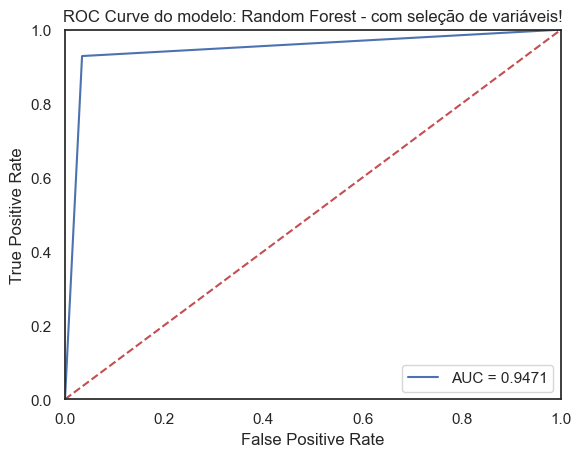

In [139]:
roc_auc_curva(y_test, previsao_v6, 'Random Forest - com seleção de variáveis')

In [140]:
resultados_modelos(y_test, previsao_v6, 'Random Forest - com seleção de variáveis')

,modelo,acuracia,roc_auc
0,Regressão Logística,0.8772,0.8128
1,Naive Bayes,0.7976,0.7494
2,KNN,0.8381,0.8306
3,Decision Tree,0.9318,0.9024
4,Random Forest,0.9581,0.9294
5,Random Forest - com seleção de variáveis,0.9600,0.9471


### Sétimo Modelo: Support Vector Machines (SVM) 

In [ ]:
C = [0.01, 0.1, 1, 10, 100, 1000]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

In [ ]:
resultados = []
for c in tq.tqdm(C):
    for k in kernel:
            modelo = SVC(C = c, kernel = k, random_state = 8).fit(X_train, y_train)
            previsao = modelo.predict(X_test)
            acuracia = round(accuracy_score(y_test, previsao), 4)
            roc_auc = round(metrics.roc_auc_score(y_test, previsao), 4)
            dicionario = {'modelo' : [c, k], 'acuracia' : acuracia, 'roc_auc' : roc_auc}
            resultados.append(dicionario)
            resultados_v7 = pd.DataFrame(resultados)

In [ ]:
resultados_v7.head(4)

#### Melhor modelo com C = 10 e kernel = poly

In [141]:
modelo_v7 = SVC(C = 10, kernel = 'poly').fit(X_train, y_train)
previsao_v7 = modelo_v7.predict(X_test)

In [142]:
metricas_avaliacao(X_test, y_test, previsao_v7, 'SVM Classifier', 'sétimo modelo')

Esse é o sétimo modelo do projeto!
----------------------------------------------------------
A acurácia do modelo de SVM Classifier é: 0.9285
O valor ROC-AUC do modelo de SVM Classifier é: 0.8533
----------------------------------------------------------
      0    1
0  1733   70
1    82  240
----------------------------------------------------------
                 precision    recall  f1-score   support

  Cliente Ativo       0.95      0.96      0.96      1803
Cliente Inativo       0.77      0.75      0.76       322

       accuracy                           0.93      2125
      macro avg       0.86      0.85      0.86      2125
   weighted avg       0.93      0.93      0.93      2125



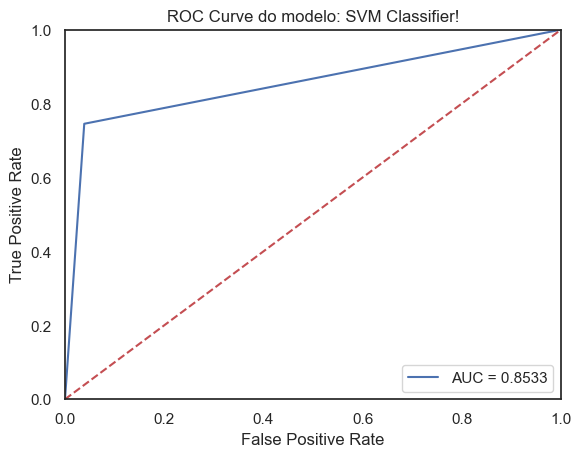

In [143]:
roc_auc_curva(y_test, previsao_v7, 'SVM Classifier')

In [144]:
resultados_modelos(y_test, previsao_v7, 'SVM Classifier')

,modelo,acuracia,roc_auc
0,Regressão Logística,0.8772,0.8128
1,Naive Bayes,0.7976,0.7494
2,KNN,0.8381,0.8306
3,Decision Tree,0.9318,0.9024
4,Random Forest,0.9581,0.9294
5,Random Forest - com seleção de variáveis,0.9600,0.9471
6,SVM Classifier,0.9285,0.8533


### Oitavo Modelo: Support Vector Machines (SVM) - com seleção de variáveis

In [ ]:
C = [0.01, 0.1, 1, 10, 100, 1000]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

In [ ]:
resultados = []
for c in tq.tqdm(C):
    for k in kernel:
            modelo = SVC(C = c, kernel = k, random_state = 8).fit(X_train_selecao, y_train)
            previsao = modelo.predict(X_test_selecao)
            acuracia = round(accuracy_score(y_test, previsao), 4)
            roc_auc = round(metrics.roc_auc_score(y_test, previsao), 4)
            dicionario = {'modelo' : [c, k], 'acuracia' : acuracia, 'roc_auc' : roc_auc}
            resultados.append(dicionario)
            resultados_v8 = pd.DataFrame(resultados)

In [ ]:
resultados_v8.head(4)

#### Melhor modelo com C =  100 e kernel = poly

In [145]:
modelo_v8 = SVC(C = 100, kernel = 'poly').fit(X_train_selecao, y_train)
previsao_v8 = modelo_v8.predict(X_test_selecao)

In [146]:
metricas_avaliacao(X_test_selecao, y_test, previsao_v8, 'SVM Classifier - Com seleção de variáveis', 'oitavo modelo')

Esse é o oitavo modelo do projeto!
----------------------------------------------------------
A acurácia do modelo de SVM Classifier - Com seleção de variáveis é: 0.9167
O valor ROC-AUC do modelo de SVM Classifier - Com seleção de variáveis é: 0.8961
----------------------------------------------------------
      0    1
0  1669  134
1    43  279
----------------------------------------------------------
                 precision    recall  f1-score   support

  Cliente Ativo       0.97      0.93      0.95      1803
Cliente Inativo       0.68      0.87      0.76       322

       accuracy                           0.92      2125
      macro avg       0.83      0.90      0.85      2125
   weighted avg       0.93      0.92      0.92      2125



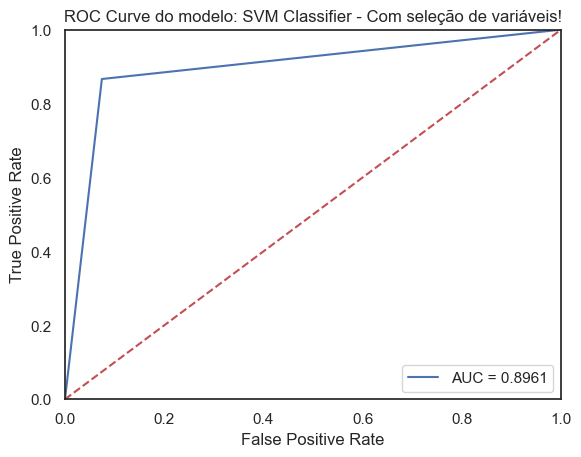

In [147]:
roc_auc_curva(y_test, previsao_v8, 'SVM Classifier - Com seleção de variáveis')

In [148]:
resultados_modelos(y_test, previsao_v8, 'SVM Classifier - Com seleção de variáveis')

,modelo,acuracia,roc_auc
0,Regressão Logística,0.8772,0.8128
1,Naive Bayes,0.7976,0.7494
2,KNN,0.8381,0.8306
3,Decision Tree,0.9318,0.9024
4,Random Forest,0.9581,0.9294
5,Random Forest - com seleção de variáveis,0.9600,0.9471
6,SVM Classifier,0.9285,0.8533
7,SVM Classifier - Com seleção de variáveis,0.9167,0.8961


### Nono Modelo: Extremely Random Forest

In [ ]:
criterio = ['gini', 'entropy']
estimacoes = [50, 100, 500, 1000]
max_dep = [3, 5, 7, 9, 11, 13, 15, 17, 19, 20]

In [ ]:
resultados = []
for c in tq.tqdm(criterio):
    for num in estimacoes:
        for d in max_dep:
            modelo = ExtraTreesClassifier(criterion = c,
                                          n_estimators = num,
                                          max_depth = d,
                                          random_state = 8, n_jobs = 12).fit(X_train, y_train)
            previsao = modelo.predict(X_test)
            acuracia = round(accuracy_score(y_test, previsao), 4)
            roc_auc = round(metrics.roc_auc_score(y_test, previsao), 4)
            dicionario = {'modelo' : [c, num, d], 'acuracia' : acuracia, 'roc_auc' : roc_auc}
            resultados.append(dicionario)
            resultados_v9 = pd.DataFrame(resultados)

In [ ]:
resultados_v9.head(4)

#### Melhor modelo com entropy, 50 estimacoes e max depth = 15!

In [149]:
modelo_v9 = ExtraTreesClassifier(criterion = 'entropy',
                                   n_estimators = 50,
                                   max_depth = 15,
                                   random_state = 8, n_jobs = 10).fit(X_train, y_train)
previsao_v9 = modelo_v9.predict(X_test)

In [150]:
metricas_avaliacao(X_test, y_test, previsao_v9, 'Extremely Random Forest', 'nono modelo')

Esse é o nono modelo do projeto!
----------------------------------------------------------
A acurácia do modelo de Extremely Random Forest é: 0.9313
O valor ROC-AUC do modelo de Extremely Random Forest é: 0.8371
----------------------------------------------------------
      0    1
0  1753   50
1    96  226
----------------------------------------------------------
                 precision    recall  f1-score   support

  Cliente Ativo       0.95      0.97      0.96      1803
Cliente Inativo       0.82      0.70      0.76       322

       accuracy                           0.93      2125
      macro avg       0.88      0.84      0.86      2125
   weighted avg       0.93      0.93      0.93      2125



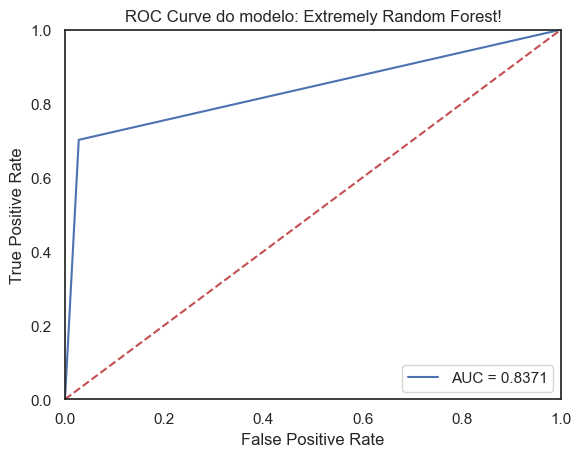

In [151]:
roc_auc_curva(y_test, previsao_v9, 'Extremely Random Forest')

In [152]:
resultados_modelos(y_test, previsao_v9, 'Extra Trees Random Forest')

,modelo,acuracia,roc_auc
0,Regressão Logística,0.8772,0.8128
1,Naive Bayes,0.7976,0.7494
2,KNN,0.8381,0.8306
3,Decision Tree,0.9318,0.9024
4,Random Forest,0.9581,0.9294
5,Random Forest - com seleção de variáveis,0.9600,0.9471
6,SVM Classifier,0.9285,0.8533
7,SVM Classifier - Com seleção de variáveis,0.9167,0.8961
8,Extra Trees Random Forest,0.9313,0.8371


### Décimo Modelo: Adaboost com Random Forest

In [161]:
estimador_base = RandomForestClassifier(criterion = 'entropy',
                                   n_estimators = 1000,
                                   max_depth = 13,
                                   n_jobs = 12,
                                   random_state = 8)

In [162]:
%%time
modelo_v10 = AdaBoostClassifier(base_estimator = estimador_base,
                                learning_rate = 0.1,
                                n_estimators = 500,
                                algorithm = 'SAMME', random_state = 8).fit(X_train, y_train)
previsao_v10 = modelo_v10.predict(X_test)

Wall time: 32 s


In [163]:
metricas_avaliacao(X_test, y_test, previsao_v10, 'AdaBoost - Com um Random Forest', 'décimo modelo')

Esse é o décimo modelo do projeto!
----------------------------------------------------------
A acurácia do modelo de AdaBoost - Com um Random Forest é: 0.9567
O valor ROC-AUC do modelo de AdaBoost - Com um Random Forest é: 0.9286
----------------------------------------------------------
      0    1
0  1747   56
1    36  286
----------------------------------------------------------
                 precision    recall  f1-score   support

  Cliente Ativo       0.98      0.97      0.97      1803
Cliente Inativo       0.84      0.89      0.86       322

       accuracy                           0.96      2125
      macro avg       0.91      0.93      0.92      2125
   weighted avg       0.96      0.96      0.96      2125



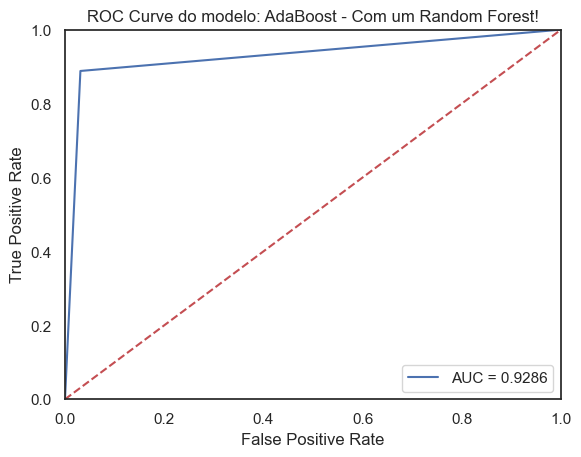

In [164]:
roc_auc_curva(y_test, previsao_v10, 'AdaBoost - Com um Random Forest')

In [157]:
resultados_modelos(y_test, previsao_v10, 'AdaBoost - Com um Random Forest')

,modelo,acuracia,roc_auc
0,Regressão Logística,0.8772,0.8128
1,Naive Bayes,0.7976,0.7494
2,KNN,0.8381,0.8306
3,Decision Tree,0.9318,0.9024
4,Random Forest,0.9581,0.9294
5,Random Forest - com seleção de variáveis,0.9600,0.9471
6,SVM Classifier,0.9285,0.8533
7,SVM Classifier - Com seleção de variáveis,0.9167,0.8961
8,Extra Trees Random Forest,0.9313,0.8371
9,AdaBoost - Com um Random Forest,0.9567,0.9286


### Décimo Primeiro Modelo: Gradient Boosting Classifier

In [ ]:
learning = [0.01, 0.1]
max_dep = [3, 6, 9, 12]
scale_weight = [1, 5]
estimadores = [500, 750, 1000, 1500]

In [ ]:
%%time
resultados = []
for l in learning:
    for m in max_dep:
        for s in scale_weight:
            for e in estimadores:
                modelo = XGBClassifier(learning_rate = l,
                                       max_depth = m,
                                       scale_pos_weight = s,
                                       n_estimators = e,
                                       n_jobs = 12,
                                       random_state = 8).fit(X_train, y_train)
                previsao = modelo.predict(X_test)
                roc_auc = round(metrics.roc_auc_score(y_test, previsao), 4)
                dicionario = {'modelo' : [l, m, s, e], 'acuracia' : acuracia, 'roc_auc' : roc_auc}
                resultados.append(dicionario)
                resultados_v11 = pd.DataFrame(resultados)

In [ ]:
resultados_v11.head(4)

#### Melhor resultado com learning_rate = 0.1, max_depth = 6, scale_pos_weight = 5 e estimadores = 1500

In [189]:
%%time
modelo_v11 = XGBClassifier(learning_rate = 0.1,
                           max_depth = 6,
                           scale_pos_weight = 5,
                           n_estimators = 1500,
                           n_jobs = 12,
                           random_state = 8).fit(X_train, y_train)
previsao_v11 = modelo_v11.predict(X_test)

Wall time: 5.55 s


In [190]:
metricas_avaliacao(X_test, y_test, previsao_v11, 'XGBoost Classifier', 'décimo primeiro modelo')

Esse é o décimo primeiro modelo do projeto!
----------------------------------------------------------
A acurácia do modelo de XGBoost Classifier é: 0.9671
O valor ROC-AUC do modelo de XGBoost Classifier é: 0.95
----------------------------------------------------------
      0    1
0  1757   46
1    24  298
----------------------------------------------------------
                 precision    recall  f1-score   support

  Cliente Ativo       0.99      0.97      0.98      1803
Cliente Inativo       0.87      0.93      0.89       322

       accuracy                           0.97      2125
      macro avg       0.93      0.95      0.94      2125
   weighted avg       0.97      0.97      0.97      2125



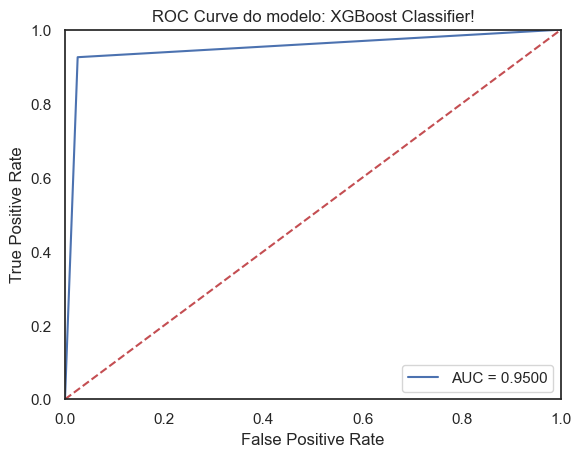

In [191]:
roc_auc_curva(y_test, previsao_v11, 'XGBoost Classifier')

In [168]:
resultados_modelos(y_test, previsao_v11, 'XGBoost Classifier')

,modelo,acuracia,roc_auc
0,Regressão Logística,0.8772,0.8128
1,Naive Bayes,0.7976,0.7494
2,KNN,0.8381,0.8306
3,Decision Tree,0.9318,0.9024
4,Random Forest,0.9581,0.9294
5,Random Forest - com seleção de variáveis,0.9600,0.9471
6,SVM Classifier,0.9285,0.8533
7,SVM Classifier - Com seleção de variáveis,0.9167,0.8961
8,Extra Trees Random Forest,0.9313,0.8371
9,AdaBoost - Com um Random Forest,0.9567,0.9286


### Décimo Segundo Modelo: CatBoost Classifier

In [192]:
learning = [0.1]
max_dep = [3, 6, 9, 12]
estimadores = [500, 750, 1000, 1500]

In [ ]:
%%time
resultados = []
for l in learning:
    for m in max_dep:
        for e in estimadores:
            modelo = CatBoostClassifier(learning_rate = l,
                                        max_depth = m,
                                        n_estimators = e,
                                        loss_function = 'Logloss',
                                        scale_pos_weight = 5,
                                        thread_count = 12,
                                        early_stopping_rounds = 5,
                                        od_pval = 10,
                                        random_state = 8).fit(X_train, y_train)
            previsao = modelo.predict(X_test)
            acuracia = round(accuracy_score(y_test, previsao), 4)
            roc_auc = round(metrics.roc_auc_score(y_test, previsao), 4)
            dicionario = {'modelo' : [l, m, e], 'acuracia' : acuracia, 'roc_auc' : roc_auc}
            resultados.append(dicionario)
            resultados_v12 = pd.DataFrame(resultados)

In [ ]:
resultados_v12.head(4)

In [ ]:
resultados_v12.head(4)

#### Melhor modelo com max_depth = 12, estimators = 750, learning rate = 0.1, loss_function = logloss, scale = 5

In [ ]:
%%time
modelo_v12 = CatBoostClassifier(learning_rate = 0.1,
                                max_depth = 12,
                                n_estimators = 750,
                                loss_function = 'Logloss',
                                thread_count = 12,
                                scale_pos_weight = 5,
                                random_state = 8).fit(X_train, y_train)
previsao_v12 = modelo_v12.predict(X_test)

In [203]:
metricas_avaliacao(X_test, y_test, previsao_v12, 'CatBoost Classifier', 'décimo segundo modelo')

Esse é o décimo segundo modelo do projeto!
----------------------------------------------------------
A acurácia do modelo de CatBoost Classifier é: 0.9619
O valor ROC-AUC do modelo de CatBoost Classifier é: 0.9546
----------------------------------------------------------
      0    1
0  1740   63
1    18  304
----------------------------------------------------------
                 precision    recall  f1-score   support

  Cliente Ativo       0.99      0.97      0.98      1803
Cliente Inativo       0.83      0.94      0.88       322

       accuracy                           0.96      2125
      macro avg       0.91      0.95      0.93      2125
   weighted avg       0.97      0.96      0.96      2125



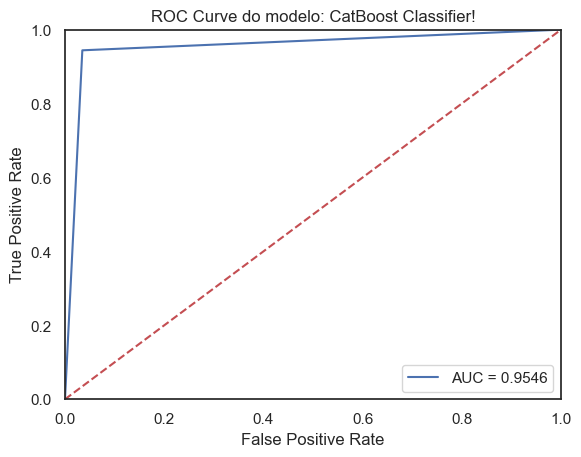

In [204]:
roc_auc_curva(y_test, previsao_v12, 'CatBoost Classifier')

In [205]:
resultados_modelos(y_test, previsao_v12, 'CatBoost Classifier')

,modelo,acuracia,roc_auc
0,Regressão Logística,0.8772,0.8128
1,Naive Bayes,0.7976,0.7494
2,KNN,0.8381,0.8306
3,Decision Tree,0.9318,0.9024
4,Random Forest,0.9581,0.9294
5,Random Forest - com seleção de variáveis,0.9600,0.9471
6,SVM Classifier,0.9285,0.8533
7,SVM Classifier - Com seleção de variáveis,0.9167,0.8961
8,Extra Trees Random Forest,0.9313,0.8371
9,AdaBoost - Com um Random Forest,0.9567,0.9286


# Resultados Finais

O melhor desempenho foi alcançado pelo algoritmo CatBoost Classifier com 96.19% de acurácia e 95.46% na métrica roc-auc. Foi considerado o melhor modelo por apresentar melhor equilíbrio entre acurácia e roc-auc, apesar do modelo XGBoost Classifier apresentar um valor superior de acurácia. O algoritmo CatBoost conseguiu uma taxa de acertos superior para prever clientes inativos como é possível ver nas tabelas a seguir.

In [207]:
df_resultados.sort_values(by = ['roc_auc', 'acuracia'], ascending = False)

,modelo,acuracia,roc_auc
11,CatBoost Classifier,0.9619,0.9546
10,XGBoost Classifier,0.9671,0.9500
5,Random Forest - com seleção de variáveis,0.9600,0.9471
4,Random Forest,0.9581,0.9294
9,AdaBoost - Com um Random Forest,0.9567,0.9286
3,Decision Tree,0.9318,0.9024
7,SVM Classifier - Com seleção de variáveis,0.9167,0.8961
6,SVM Classifier,0.9285,0.8533
8,Extra Trees Random Forest,0.9313,0.8371
2,KNN,0.8381,0.8306


In [208]:
metricas_avaliacao(X_test, y_test, previsao_v12, 'CatBoost Classifier', 'décimo segundo modelo')

Esse é o décimo segundo modelo do projeto!
----------------------------------------------------------
A acurácia do modelo de CatBoost Classifier é: 0.9619
O valor ROC-AUC do modelo de CatBoost Classifier é: 0.9546
----------------------------------------------------------
      0    1
0  1740   63
1    18  304
----------------------------------------------------------
                 precision    recall  f1-score   support

  Cliente Ativo       0.99      0.97      0.98      1803
Cliente Inativo       0.83      0.94      0.88       322

       accuracy                           0.96      2125
      macro avg       0.91      0.95      0.93      2125
   weighted avg       0.97      0.96      0.96      2125



In [209]:
metricas_avaliacao(X_test, y_test, previsao_v11, 'XGBoost Classifier', 'décimo primeiro modelo')

Esse é o décimo primeiro modelo do projeto!
----------------------------------------------------------
A acurácia do modelo de XGBoost Classifier é: 0.9671
O valor ROC-AUC do modelo de XGBoost Classifier é: 0.95
----------------------------------------------------------
      0    1
0  1757   46
1    24  298
----------------------------------------------------------
                 precision    recall  f1-score   support

  Cliente Ativo       0.99      0.97      0.98      1803
Cliente Inativo       0.87      0.93      0.89       322

       accuracy                           0.97      2125
      macro avg       0.93      0.95      0.94      2125
   weighted avg       0.97      0.97      0.97      2125



# Fim